# Thyroid

In [13]:
# loading the important libraries 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline
pd.set_option('display.max_columns', 26)


In [14]:
df= pd.read_csv('Group4_kidney_disease.csv')
df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [15]:
df.shape

(400, 26)

In [16]:
#dropping an unecessary column
df.drop('id', axis = 1, inplace = True)

In [17]:
#making the columns names to be less ambiguous
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [18]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [19]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [21]:
#Null values needed to be handled

In [22]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [24]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [25]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [26]:
#There is some ambugity present in the columns we have to remove that.

# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [27]:
#converting the class from a categorical value into a numeric value 
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [28]:
#unique values
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



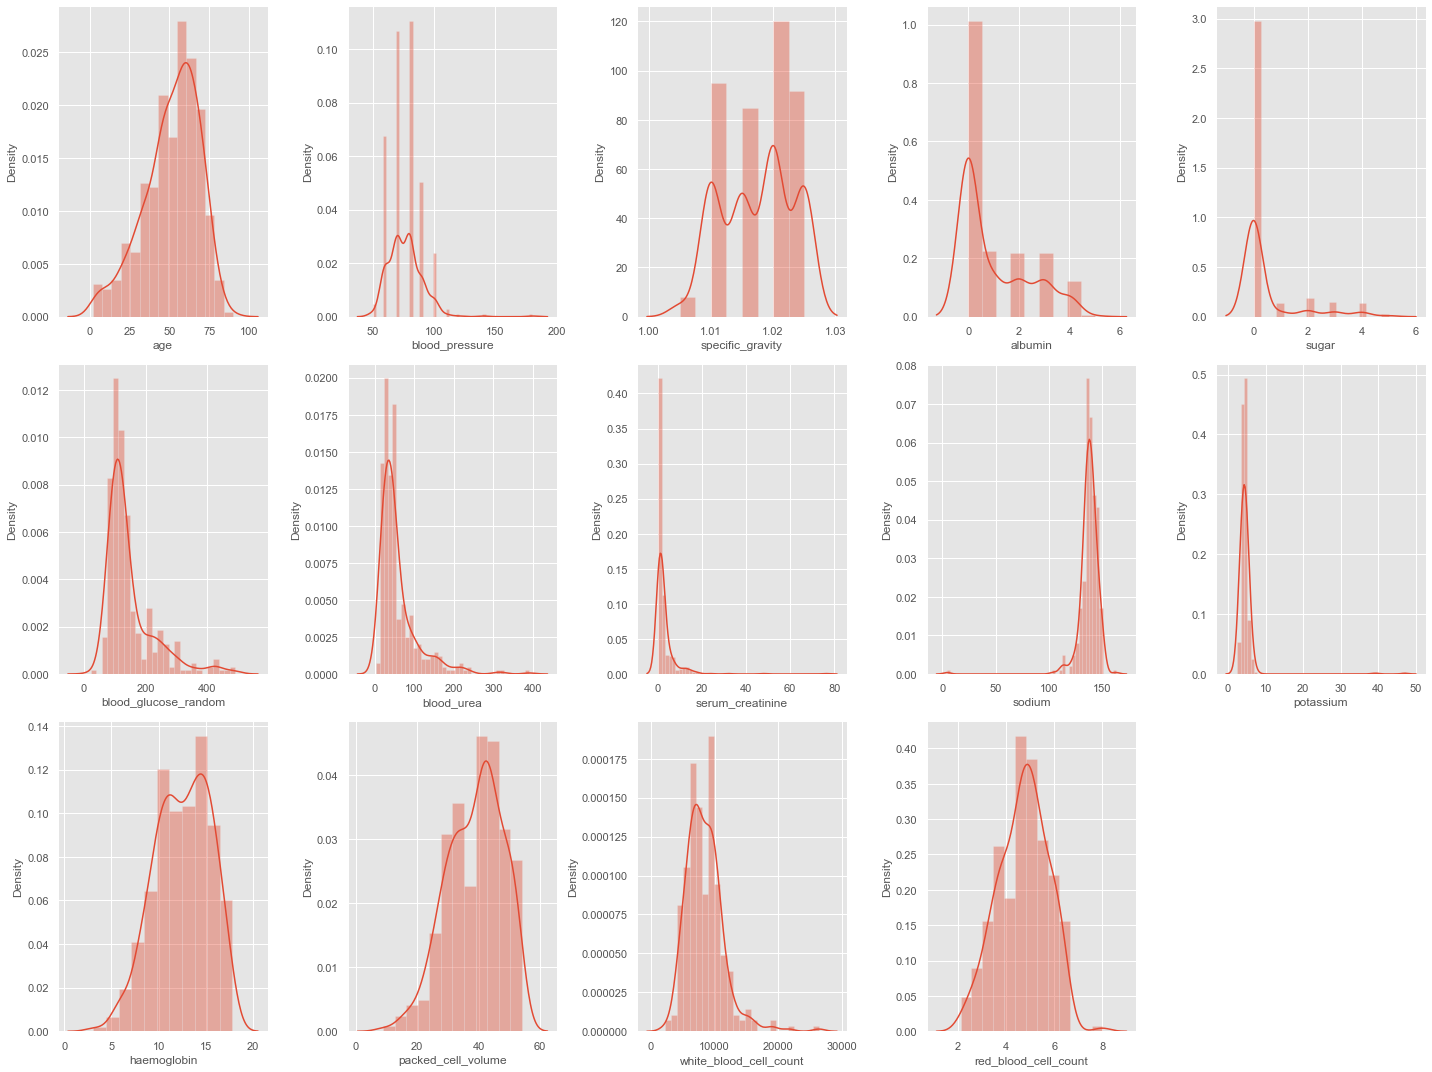

In [29]:
#distribution plot to check skewness
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

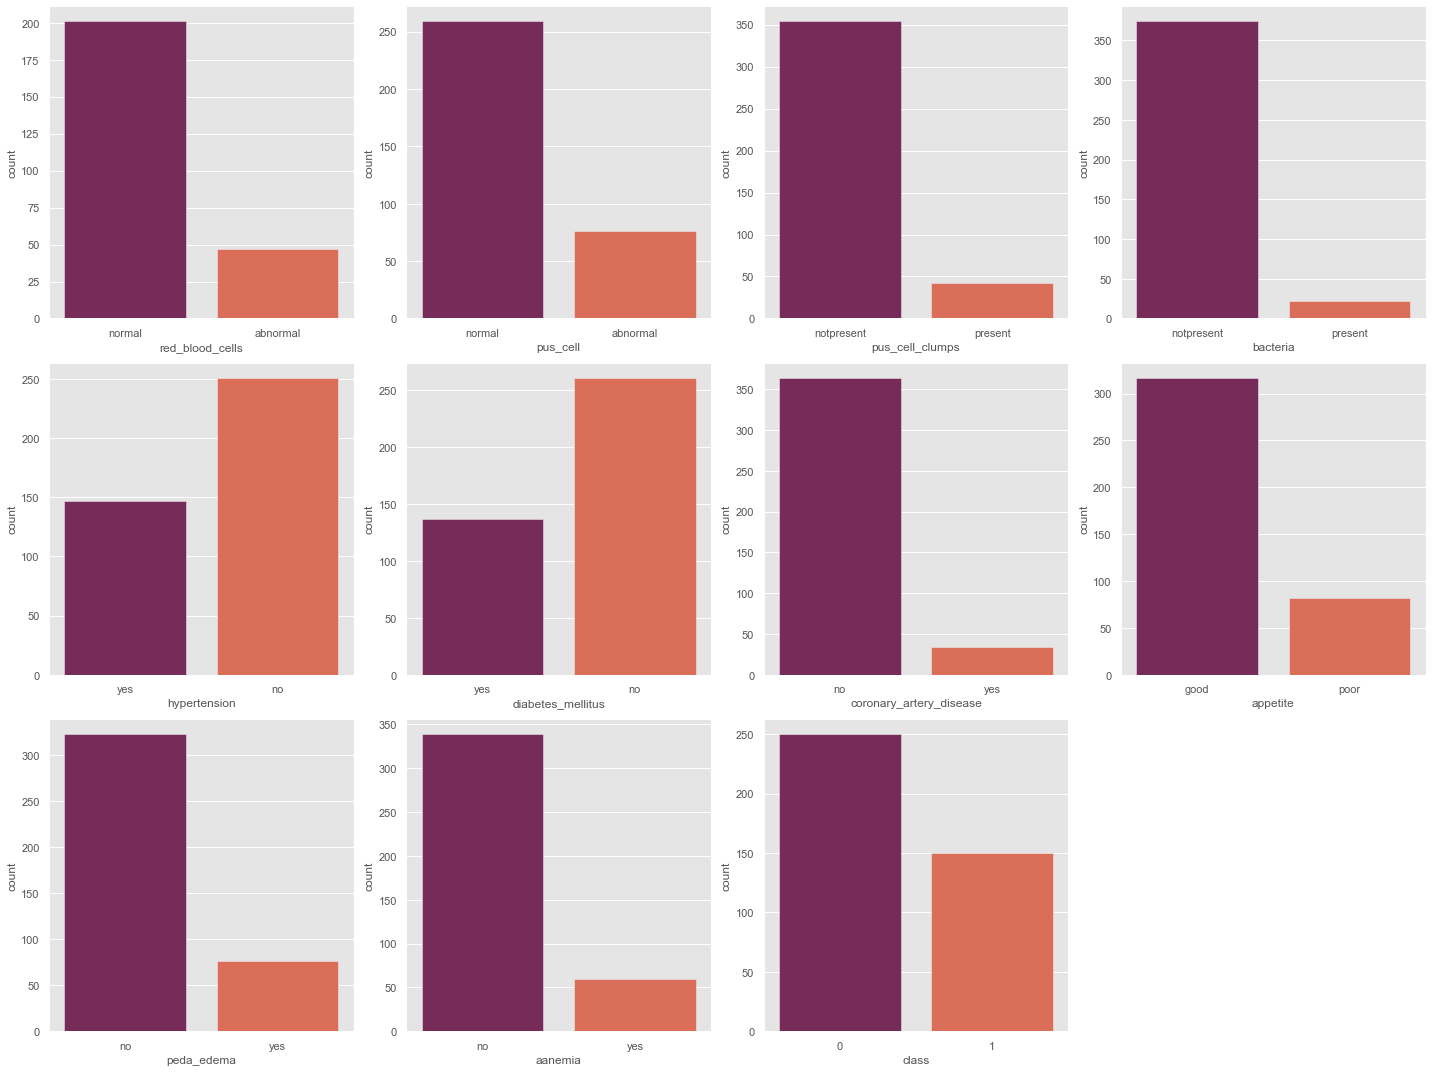

In [30]:
#count plot of the unique values in each column
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [31]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

# EXPLORATY DATA ANALYSIS (EDA)

In [32]:
#kde plot
def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    


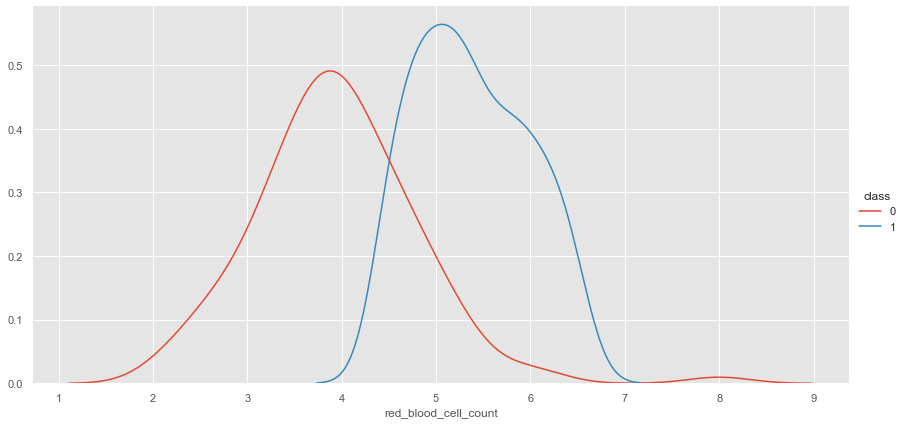

In [33]:
kde('red_blood_cell_count')

In [34]:
#in feature red_blood_cell_count,class 1 (kidney disease = yes) situated in the range between 3.7 to 7.3

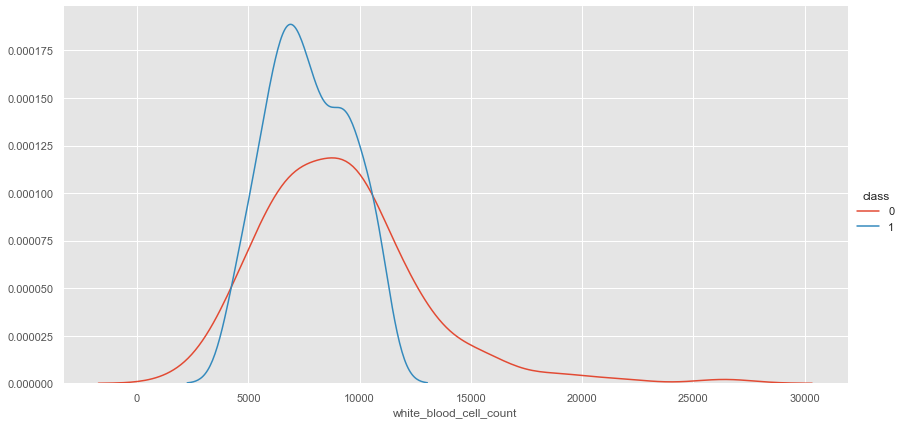

In [35]:
kde('white_blood_cell_count')

In [36]:
#in feature white_blood_cell_count,class 1 (kidney disease = yes) situated in the range between 2500 to 13000

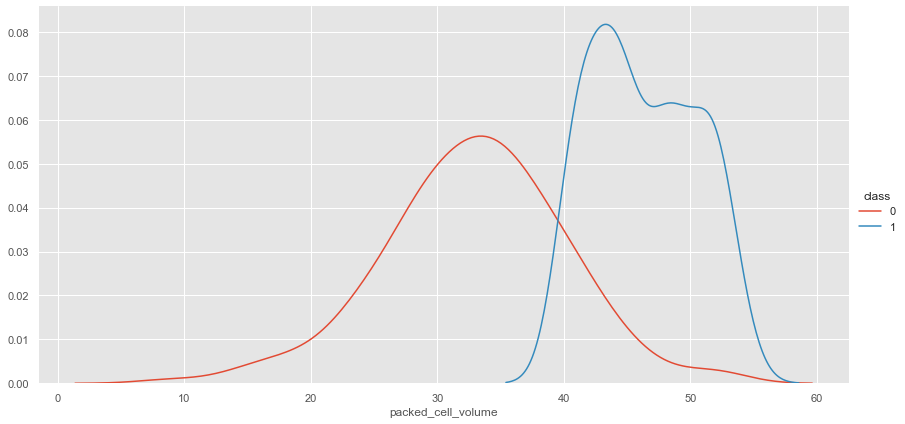

In [37]:
kde('packed_cell_volume')

In [38]:
#in feature packed_cell_volume,class 1 (kidney disease = yes) situated in the range between 35 to 57

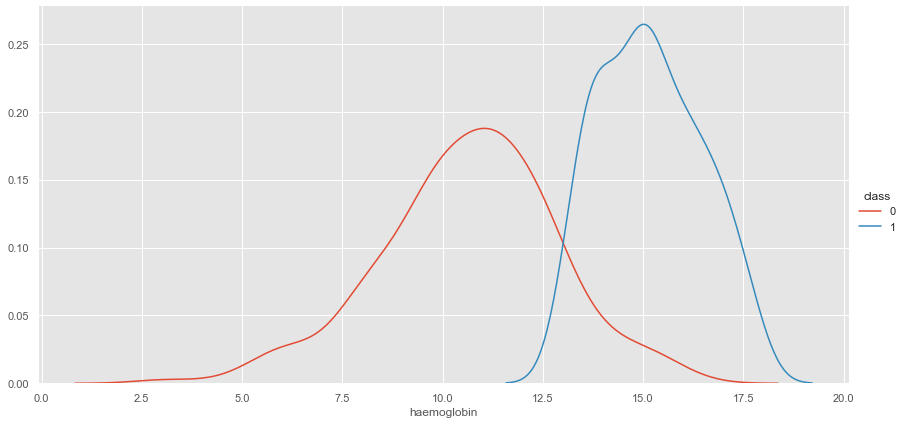

In [39]:
kde('haemoglobin')

In [40]:
#in feature haemoglobin,class 1 (kidney disease = yes) situated in the range between 12 to 19

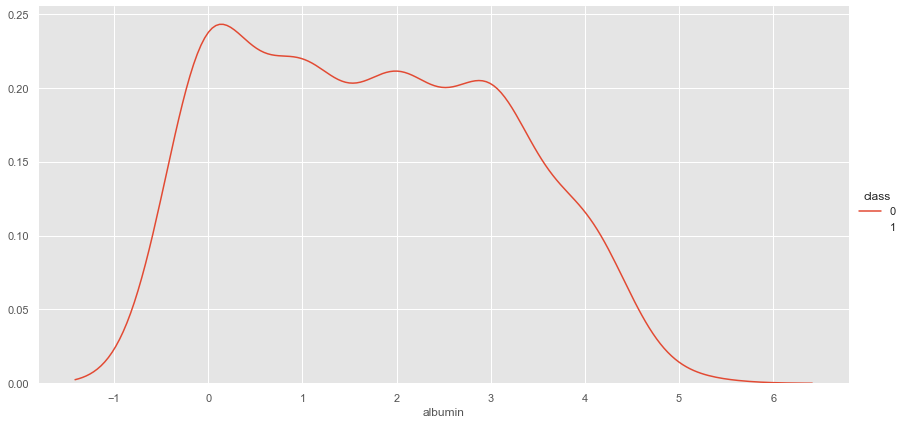

In [41]:
kde('albumin')

In [42]:
#in feature albumin,class 1 (kidney disease = yes) is obscure

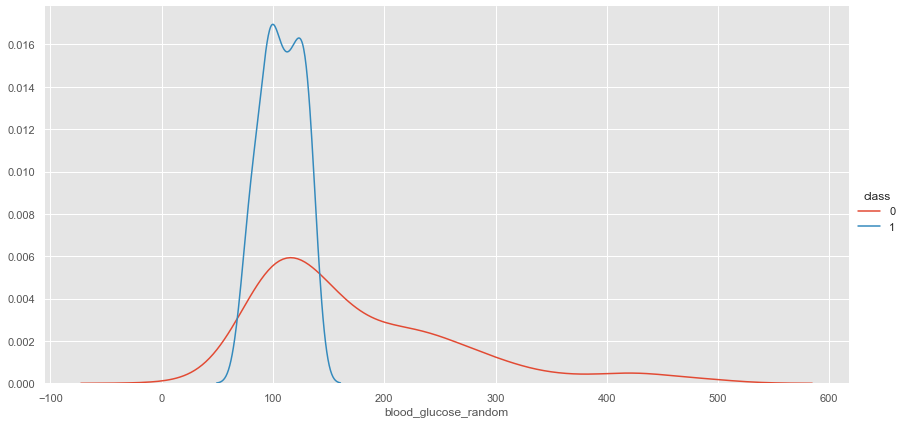

In [43]:
kde('blood_glucose_random')

In [44]:
#in feature blood_glucose_random,class 1 (kidney disease = yes) situated in the range between 50 to 150

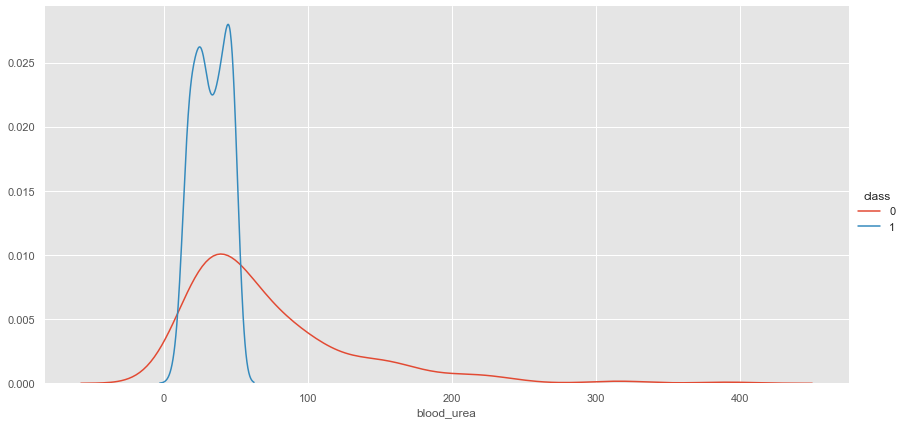

In [45]:
kde('blood_urea')

In [46]:
#in feature blood_urea,class 1 (kidney disease = yes) situated in the range between 0 to 50

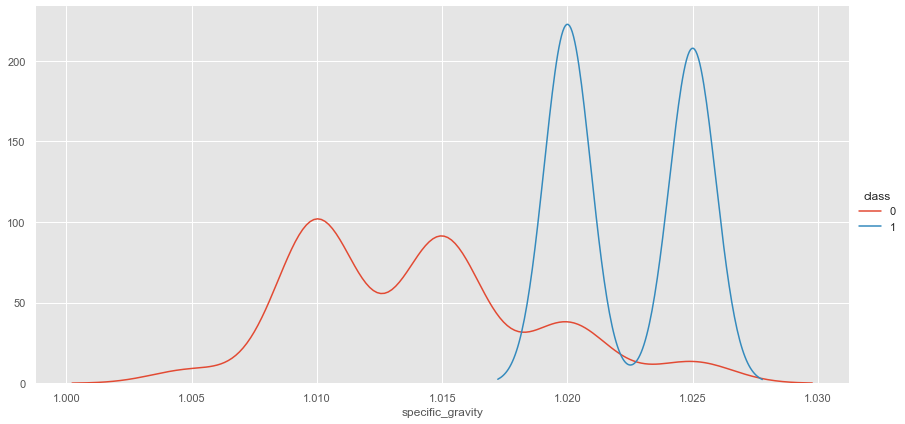

In [47]:
kde('specific_gravity')

In [48]:
#in feature specific_gravity,class 1 (kidney disease = yes) situated in the range between 1.017 to 1.027

# DATA PRE PROCESSING

In [49]:
#checking null values in descending order 
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [50]:
#checking null values in numeric variables
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [51]:
#checking null values in categorical variables
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [52]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [53]:
for col in num_cols:
    random_value_imputation(col)

In [54]:
#checking null values in numeric variables
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [55]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [56]:
#checking null values in categorical variables
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

# All the missing values are handeled now, lets do categorical features encoding now



# Machine learning algorithms don't understand categorical values so we need to convert them into numeric values

# FEATURE ENCODING

In [57]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [58]:
#As all of the categorical columns have 2 categories,we can use label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [59]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,141.0,5.0,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,18.0,0.8,135.0,4.6,11.3,38.0,6000.0,4.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,135.0,5.0,9.6,31.0,7500.0,4.7,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,136.0,3.5,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


# Partitioning

In [60]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
Y = df[dep_col]

In [61]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [62]:
Y.value_counts()

0    250
1    150
Name: class, dtype: int64

In [63]:
250/(250+150)

0.625

In [64]:
150/(250+150)

0.375

In [65]:
#HoldOut Validation Approach - Train-test split

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)


In [67]:
y_test.value_counts()

0    72
1    48
Name: class, dtype: int64

In [68]:
72/(72+48)

0.6

In [69]:
#Stratified Train Test Split

In [70]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.30, random_state = 0, stratify = Y)


In [71]:
y1_train.value_counts()

0    175
1    105
Name: class, dtype: int64

In [72]:
y1_test.value_counts()

0    75
1    45
Name: class, dtype: int64

In [73]:
45/(45+75)

0.375

# Normalization

In [74]:
# Feature Scaling

In [75]:
#We always scale the features in the range between 0 to 1 after partitioning

In [76]:
X.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,51.520000,76.375000,1.017437,1.01750,0.472500,0.815000,0.76500,0.105000,0.055000,146.815000,58.000500,3.112875,137.628750,4.558000,12.636000,39.197500,8419.500000,4.693000,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000
std,17.192981,13.622529,0.005719,1.35343,1.107841,0.388784,0.42453,0.306937,0.228266,76.745916,52.068564,5.727513,9.784408,2.838323,2.897878,8.889096,3030.847214,1.046633,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.00000,0.000000,1.000000,1.00000,0.000000,0.000000,100.000000,27.000000,0.900000,135.000000,3.800000,10.475000,32.750000,6500.000000,3.900000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,1.000000,1.00000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.950000,41.000000,7950.000000,4.700000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,64.250000,80.000000,1.020000,2.00000,0.000000,1.000000,1.00000,0.000000,0.000000,162.250000,66.000000,2.800000,142.000000,4.900000,15.000000,46.000000,9800.000000,5.400000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.00000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [77]:
scale_vars = []

for cols in X.columns:
    if X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [79]:
#We will scale based on X_train and then transform both X_train and X_test

In [80]:
scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [81]:
X_test.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
132,0.545455,0.153846,0.50,0.00,0.8,1,1,0,0,0.379135,0.435696,0.279412,0.480769,0.044944,0.374150,0.333333,0.454545,0.101695,1,0,0,0,1,1
309,0.556818,0.076923,0.75,0.00,0.0,1,0,0,0,0.150127,0.039370,0.014706,0.538462,0.056180,0.959184,0.688889,0.243802,0.644068,0,0,0,0,0,0
341,0.693182,0.153846,1.00,0.00,0.0,1,1,0,0,0.152672,0.070866,0.008403,0.750000,0.056180,0.700680,0.711111,0.210744,0.440678,0,0,0,0,0,0
196,0.534091,0.384615,0.25,0.75,0.0,0,0,0,0,0.150127,0.388451,0.237395,0.211538,0.015730,0.340136,0.333333,0.305785,0.237288,1,1,0,1,1,1
246,0.522727,0.461538,0.50,0.75,0.0,0,1,1,0,0.091603,0.538058,0.308824,0.173077,0.071910,0.374150,0.377778,0.115702,0.067797,1,0,1,0,0,1


In [82]:
X_train.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,0.560471,0.200275,0.631250,0.244643,0.092857,0.821429,0.753571,0.103571,0.046429,0.193039,0.121407,0.046065,0.523558,0.048395,0.658844,0.677778,0.258914,0.441586,0.382143,0.364286,0.078571,0.210714,0.200000,0.132143
std,0.200700,0.108297,0.283122,0.331943,0.214072,0.383679,0.431703,0.305249,0.210788,0.187771,0.129864,0.091785,0.127140,0.075359,0.191471,0.192923,0.118347,0.176667,0.486781,0.482091,0.269550,0.408546,0.400716,0.339252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.454545,0.153846,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.073155,0.044619,0.008403,0.461538,0.030899,0.528912,0.533333,0.185950,0.305085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.596591,0.153846,0.750000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.125954,0.089239,0.015756,0.519231,0.042697,0.670068,0.711111,0.239669,0.440678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.715909,0.230769,0.750000,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.241730,0.143045,0.043067,0.596154,0.053933,0.809524,0.822222,0.314050,0.559322,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
X_test.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.567992,0.208974,0.600000,0.277083,0.098333,0.800000,0.791667,0.108333,0.075000,0.201103,0.136669,0.075490,0.485337,0.041236,0.625057,0.655370,0.252548,0.434605,0.333333,0.291667,0.100000,0.191667,0.166667,0.191667
std,0.183049,0.096265,0.292411,0.353250,0.239040,0.401677,0.407819,0.312104,0.264496,0.212498,0.151387,0.167875,0.282455,0.017021,0.208670,0.207885,0.140450,0.179733,0.473381,0.456435,0.301258,0.395263,0.374241,0.395263
min,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122137,-0.022310,-0.002101,-2.048077,0.004494,0.170068,0.155556,0.000000,0.067797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.477273,0.153846,0.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.085242,0.041995,0.010504,0.461538,0.026404,0.448980,0.483333,0.165289,0.283898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.602273,0.230769,0.625000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.134860,0.078740,0.017857,0.538462,0.041573,0.666667,0.688889,0.231405,0.440678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.693182,0.230769,0.750000,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.213104,0.162730,0.063550,0.596154,0.053933,0.797619,0.800000,0.314050,0.563559,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.920455,0.461538,1.000000,1.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.068702,0.818898,1.586134,0.750000,0.092135,1.000000,1.000000,1.000000,0.745763,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
scaler.fit(X1_train[scale_vars])
X1_train[scale_vars] = scaler.transform(X1_train[scale_vars])
X1_test[scale_vars] = scaler.transform(X1_test[scale_vars])

In [85]:
X1_test.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
172,0.681818,0.333333,0.25,0.2,0.4,1,1,0,0,0.613248,0.286264,0.079114,0.440678,0.000000,0.510204,0.555556,0.438017,0.474576,0,0,0,0,0,0
197,0.625000,0.333333,0.75,0.0,0.0,1,0,0,0,0.202991,0.281130,0.281646,0.338983,0.076712,0.251701,0.222222,0.086777,0.152542,1,1,0,0,0,1
25,0.670455,0.111111,1.00,0.0,0.0,1,1,0,0,0.183761,0.188703,0.047468,0.627119,0.073973,0.462585,0.444444,0.256198,0.271186,1,1,0,0,0,1
53,0.681818,0.333333,0.50,0.0,1.0,1,0,0,0,0.478632,0.057766,0.018987,0.576271,0.060274,0.714286,0.688889,0.260331,0.440678,1,1,0,0,0,0
21,0.659091,0.444444,0.50,0.0,0.0,1,1,0,0,0.301282,0.458280,2.392405,-1.686441,0.065753,0.530612,0.511111,0.165289,0.254237,1,1,1,0,0,0


In [86]:
X1_train.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,0.551461,0.284127,0.607143,0.224286,0.094286,0.803571,0.764286,0.103571,0.067857,0.266575,0.146356,0.076305,0.582869,0.054785,0.640015,0.667302,0.263518,0.441344,0.364286,0.350000,0.082143,0.207143,0.221429,0.146429
std,0.193523,0.141594,0.286561,0.279752,0.220710,0.398008,0.425204,0.305249,0.251951,0.168299,0.135832,0.121135,0.115938,0.060100,0.198600,0.199498,0.131745,0.177209,0.482091,0.477824,0.275074,0.405984,0.415952,0.354168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.443182,0.222222,0.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.166667,0.065469,0.015823,0.525424,0.035616,0.494898,0.527778,0.185950,0.305085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.585227,0.222222,0.750000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.213675,0.109114,0.028481,0.584746,0.052055,0.646259,0.711111,0.237603,0.440678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.693182,0.333333,0.750000,0.400000,0.000000,1.000000,1.000000,0.000000,0.000000,0.281517,0.165597,0.075949,0.644068,0.065753,0.802721,0.800000,0.314050,0.563559,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
X1_test.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.589015,0.313889,0.656250,0.155000,0.095000,0.841667,0.766667,0.108333,0.02500,0.266987,0.142033,0.108122,0.539901,0.060114,0.668991,0.679815,0.241804,0.435169,0.375000,0.325000,0.091667,0.200000,0.116667,0.158333
std,0.197953,0.170839,0.282662,0.242484,0.224488,0.366584,0.424726,0.312104,0.15678,0.154138,0.129026,0.273920,0.243711,0.108566,0.192968,0.193418,0.107546,0.178498,0.486153,0.470339,0.289765,0.401677,0.322369,0.366584
min,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.102564,0.021823,0.003165,-1.686441,0.000000,0.163265,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.488636,0.222222,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.164530,0.060334,0.015823,0.525424,0.032877,0.542517,0.527778,0.152893,0.322034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.642045,0.333333,0.750000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.205128,0.092426,0.025316,0.576271,0.050685,0.697279,0.711111,0.237603,0.440678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.738636,0.333333,1.000000,0.200000,0.000000,1.000000,1.000000,0.000000,0.00000,0.318910,0.150193,0.076741,0.627119,0.065753,0.812925,0.822222,0.314050,0.559322,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.909091,1.444444,1.000000,0.800000,1.000000,1.000000,1.000000,1.000000,1.00000,0.861111,0.614891,2.392405,0.779661,1.219178,1.000000,1.000000,0.537190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Selection

In [88]:
X_train.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
92,0.784091,0.153846,0.25,0.75,0.0,1,0,1,1,0.379135,0.188976,0.065126,0.423077,0.042697,0.496599,0.533333,0.140496,0.254237,1,1,1,0,0,0
223,0.784091,0.307692,0.25,0.00,0.6,1,1,0,0,0.592875,0.052493,0.016807,0.480769,0.035955,0.673469,0.644444,0.289256,0.423729,1,1,0,0,0,0
234,0.397727,0.384615,0.25,0.00,0.0,0,1,0,0,0.351145,0.023622,0.016807,0.576923,0.044944,0.809524,0.777778,0.078512,0.525424,1,0,0,0,0,0
232,0.545455,0.307692,0.50,0.25,0.0,0,0,0,0,0.089059,0.026247,0.344538,0.173077,0.029213,0.884354,0.711111,0.342975,0.000000,0,0,0,0,1,0
377,0.704545,0.153846,0.75,0.00,0.0,1,1,0,0,0.068702,0.044619,0.004202,0.653846,0.051685,0.727891,0.888889,0.173554,0.457627,0,0,0,0,0,0


In [89]:
#Algorithm 3 - Feature Selection using Information Gain

In [90]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 20)
mutual_info


array([0.05010267, 0.08143753, 0.28162255, 0.26426325, 0.06430245,
       0.05506556, 0.1123099 , 0.01997984, 0.02415762, 0.17271924,
       0.13654282, 0.31880533, 0.15997902, 0.08947598, 0.34752159,
       0.2815128 , 0.04019955, 0.12989194, 0.27289932, 0.20790775,
       0.02977179, 0.10628601, 0.10165168, 0.0326229 ])

In [91]:
print(len(mutual_info))
print(X_train.shape)

24
(280, 24)


In [92]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

haemoglobin                0.347522
serum_creatinine           0.318805
specific_gravity           0.281623
packed_cell_volume         0.281513
hypertension               0.272899
albumin                    0.264263
diabetes_mellitus          0.207908
blood_glucose_random       0.172719
sodium                     0.159979
blood_urea                 0.136543
red_blood_cell_count       0.129892
pus_cell                   0.112310
appetite                   0.106286
peda_edema                 0.101652
potassium                  0.089476
blood_pressure             0.081438
sugar                      0.064302
red_blood_cells            0.055066
age                        0.050103
white_blood_cell_count     0.040200
aanemia                    0.032623
coronary_artery_disease    0.029772
bacteria                   0.024158
pus_cell_clumps            0.019980
dtype: float64

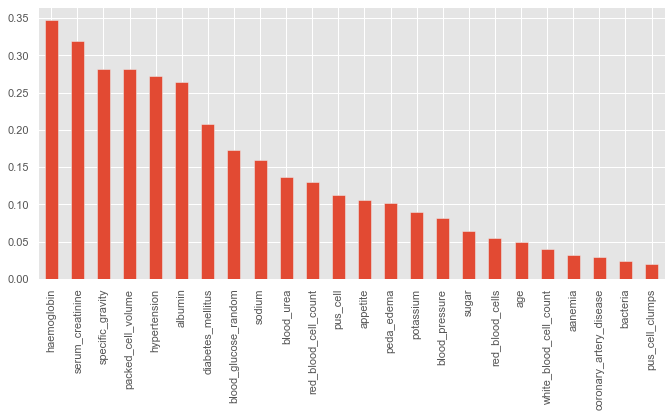

In [93]:
plt.figure(figsize = (10, 5))
mutual_info.sort_values(ascending = False).plot.bar();

In [94]:
#Algorithm 4 - Feature Selection using RFECV (Recursive Feature Elimination with Cross Validation)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [96]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 10


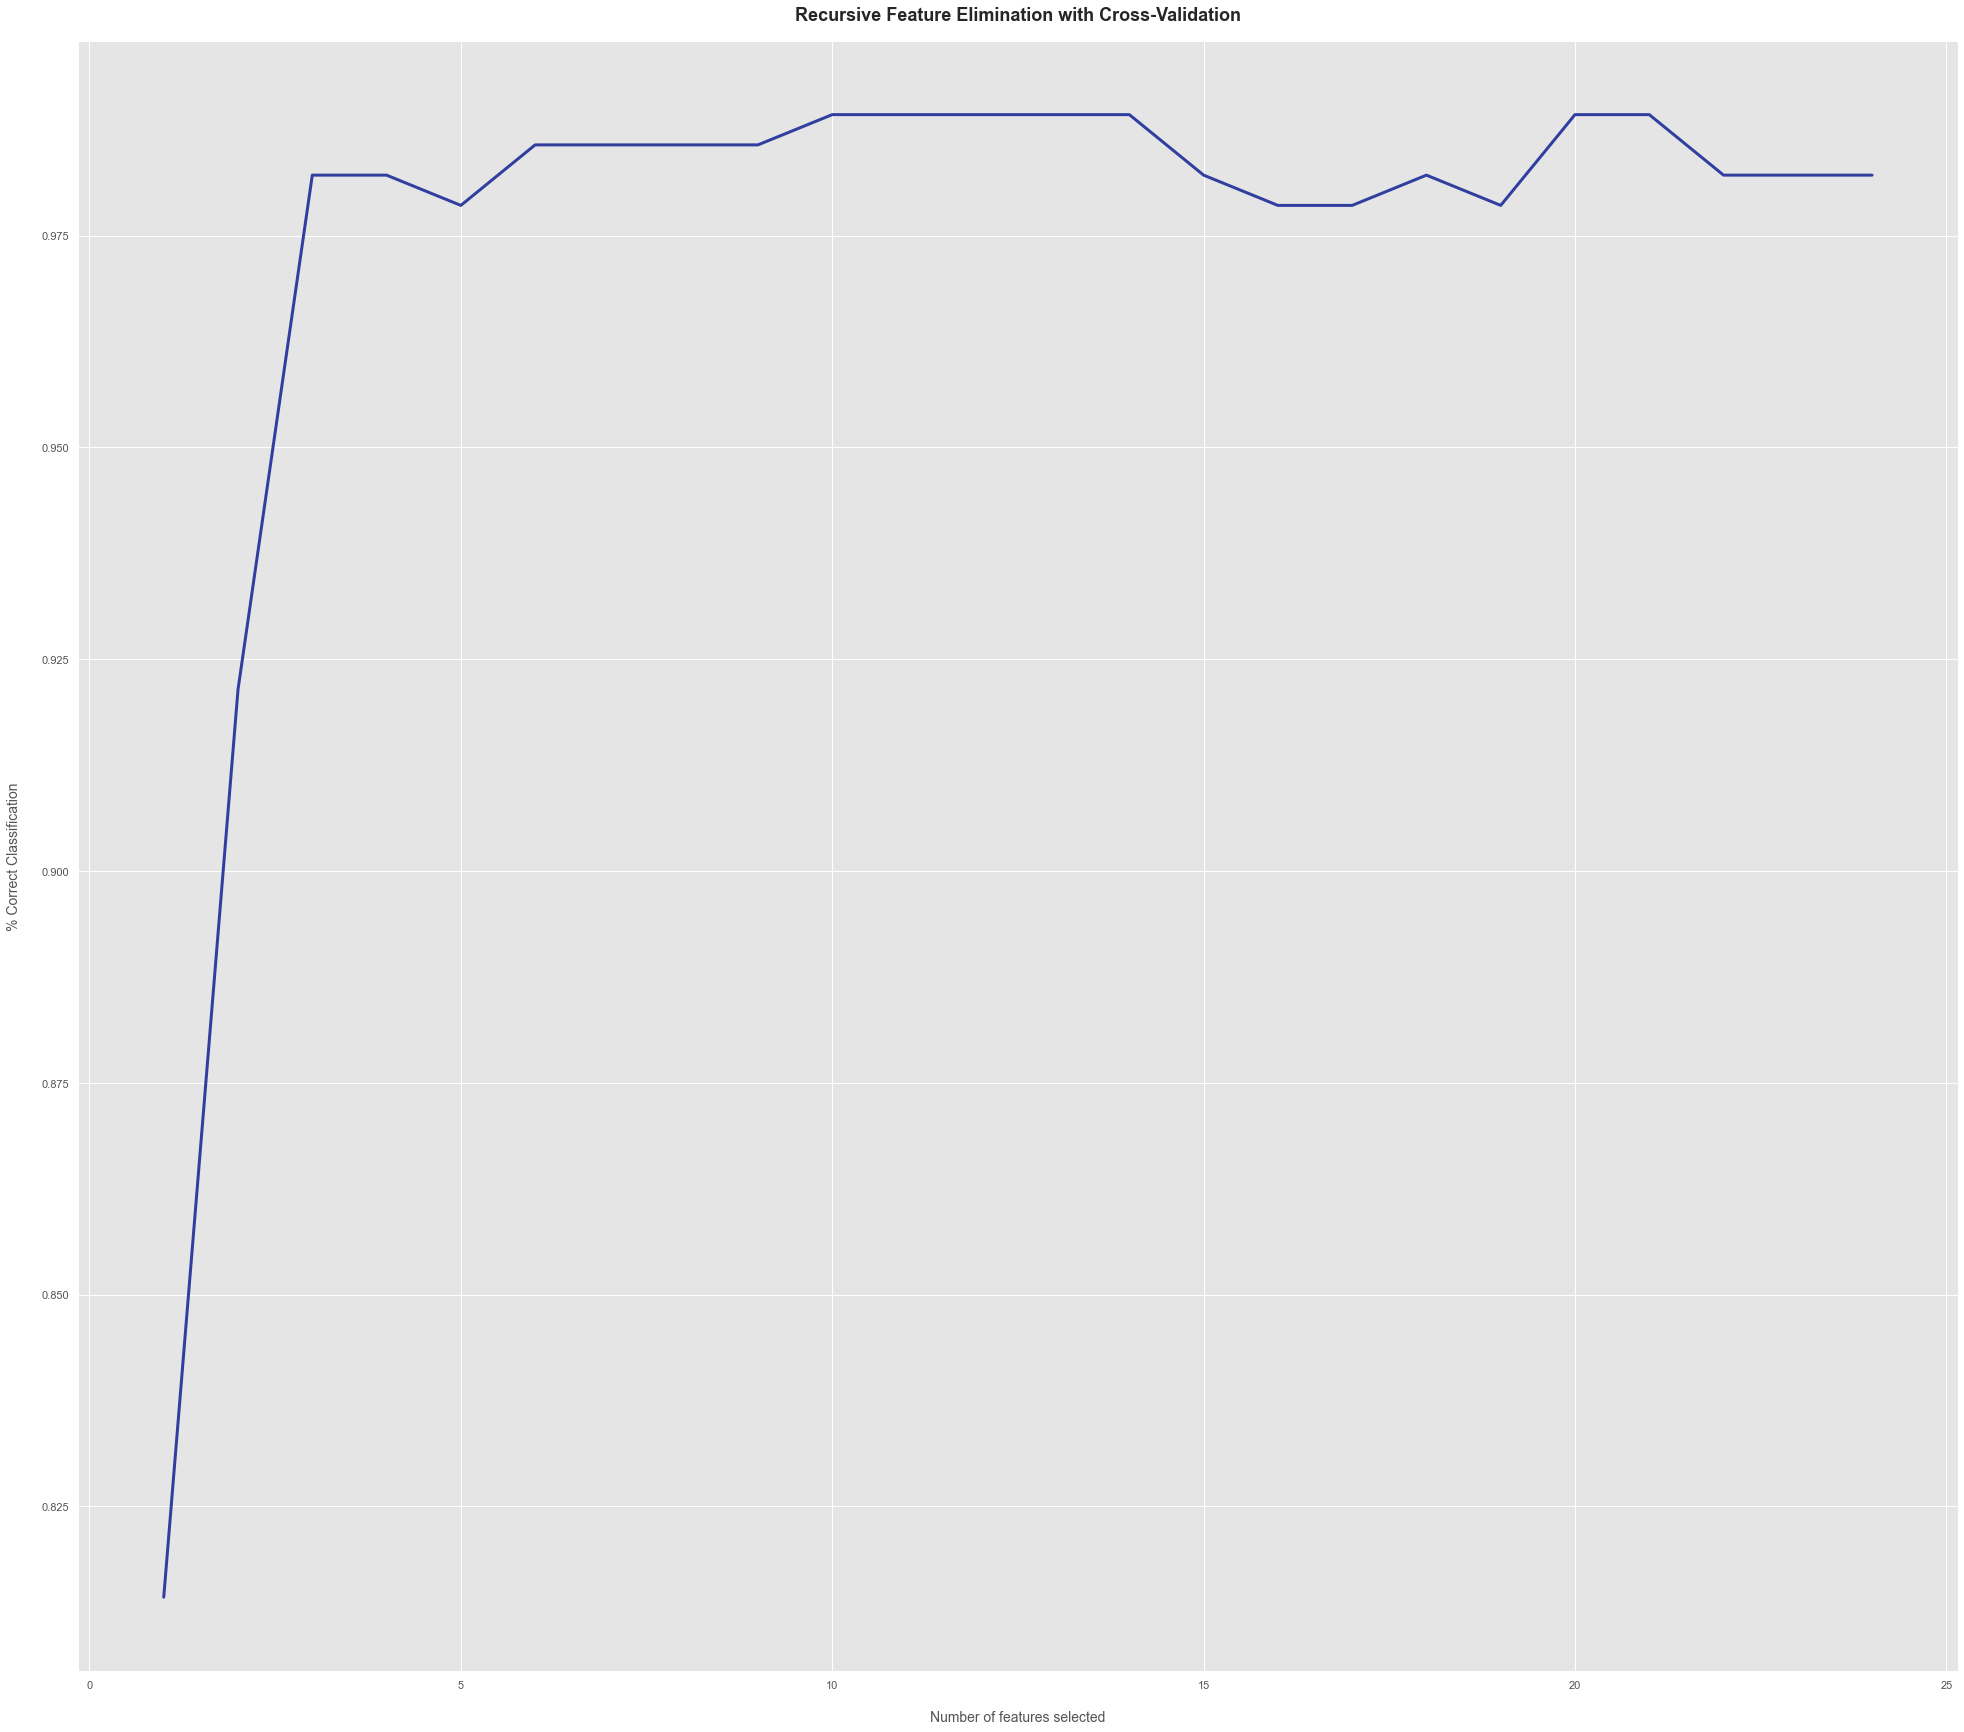

In [97]:
plt.figure(figsize=(30, 30))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [98]:
print(np.where(rfecv.support_ == False)[0])

[ 0  1  4  5  6  7  8 12 13 16 17 20 21 23]


In [99]:
selected_features = X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1)

In [100]:
rfecv.estimator_.feature_importances_

array([0.2306972 , 0.09607873, 0.04765038, 0.01500641, 0.1743821 ,
       0.24995269, 0.0899074 , 0.05147258, 0.03116108, 0.01369143])

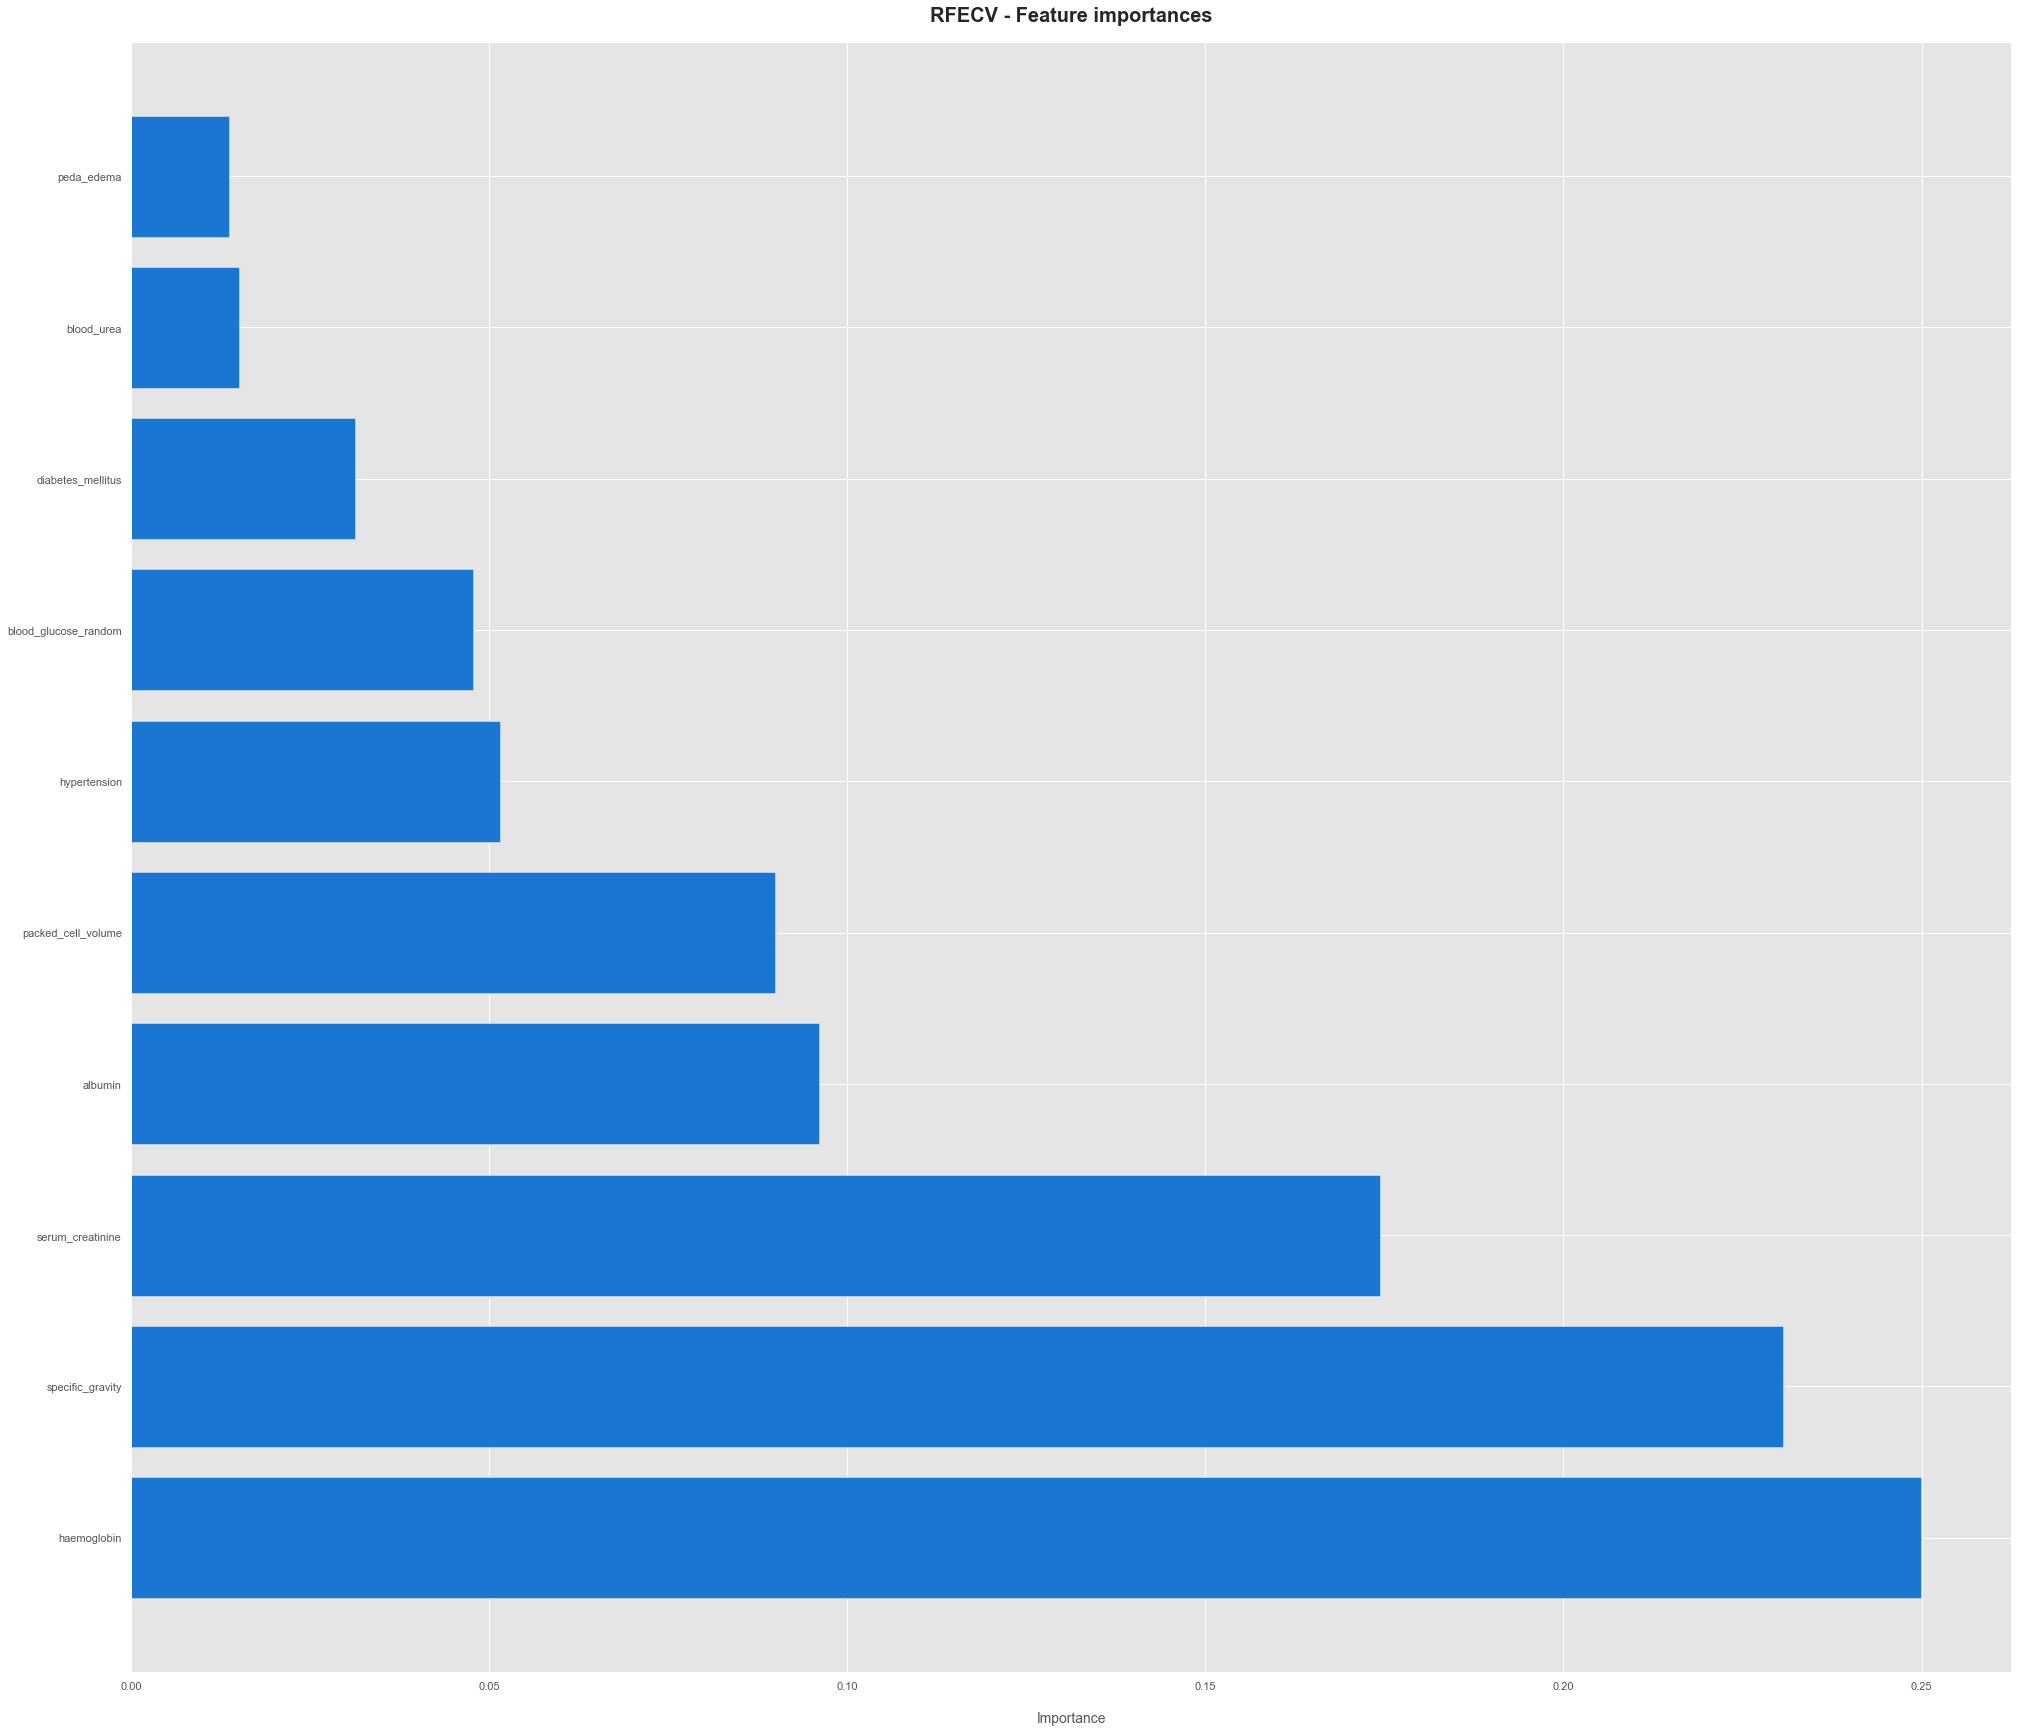

In [101]:
dset = pd.DataFrame()
dset['attr'] = selected_features.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(30, 30))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()


In [102]:
dset

,attr,importance
5,haemoglobin,0.249953
0,specific_gravity,0.230697
4,serum_creatinine,0.174382
1,albumin,0.096079
6,packed_cell_volume,0.089907
7,hypertension,0.051473
2,blood_glucose_random,0.047650
8,diabetes_mellitus,0.031161
3,blood_urea,0.015006
9,peda_edema,0.013691


In [103]:
#Algorithm 1 - Dropping Constant Features using Variance Threshold Technique


In [104]:
from sklearn.feature_selection import VarianceThreshold
# By default, the threshold = 0 i.e. it will remove the zero-variance threshold
var_thresh = VarianceThreshold() # by default the threshold = 0
var_thresh.fit(X_train)

VarianceThreshold()

In [105]:
print("Features Selected: ", X_train.columns[var_thresh.get_support()])

Features Selected:  Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia'],
      dtype='object')


In [106]:
len(X_train.columns[var_thresh.get_support()])

24

In [107]:
#There's no feature with zero variance

In [108]:
#Algorithm 2 - Feature Selection with Pearson's correlation


In [109]:
#Idea Highly correlated features with the target variable are important features, High correlation between features, (say over 90% or over 80%) indicate the existence of duplicate features.In case of duplicate features, we do not need to take all the features but one one of them would suffice


In [110]:
# Let's find the feature correlations

corr = X_train.corr()
corr

# Note that the correlation values lie between -1 and +1
# A correlation value close to -1 indicates a strong negative linear correlation
# A correlation value close to +1 indicates a strong positive linear correlation
# A correlation value close to 0 indicates no linear correlation

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
age,1.000000,0.134876,-0.209885,0.159862,0.209168,-0.119500,-0.188892,0.157351,0.104769,0.241952,0.154875,0.160710,-0.073309,0.048387,-0.218306,-0.161528,0.129047,-0.179429,0.415486,0.418521,0.227316,0.148045,0.100782,0.042536
blood_pressure,0.134876,1.000000,-0.152248,0.152666,0.205827,-0.177972,-0.155415,0.062523,0.086400,0.195749,0.124619,0.111466,-0.126701,0.060997,-0.285073,-0.281961,0.032174,-0.187595,0.258456,0.197694,0.063483,0.183141,0.033037,0.147595
specific_gravity,-0.209885,-0.152248,1.000000,-0.390558,-0.222504,0.191786,0.287568,-0.313382,-0.177549,-0.351731,-0.252547,-0.193868,0.279534,-0.050185,0.477675,0.445671,-0.147925,0.325841,-0.345729,-0.417205,-0.147355,-0.201223,-0.232206,-0.209205
albumin,0.159862,0.152666,-0.390558,1.000000,0.319751,-0.197501,-0.421943,0.376917,0.285308,0.288006,0.291015,0.209335,-0.297104,0.118750,-0.436178,-0.412616,0.217250,-0.297484,0.500716,0.359403,0.205012,0.325509,0.432484,0.229105
sugar,0.209168,0.205827,-0.222504,0.319751,1.000000,-0.067951,-0.170372,0.126548,0.078863,0.512391,0.158186,0.169809,-0.092816,0.205238,-0.162695,-0.126515,0.098397,-0.148090,0.291133,0.462903,0.258220,0.054155,0.150418,0.087073
red_blood_cells,-0.119500,-0.177972,0.191786,-0.197501,-0.067951,1.000000,0.209438,-0.086346,-0.030073,-0.134540,-0.114755,-0.089945,0.198173,0.045626,0.161470,0.223818,-0.045712,0.144902,-0.170661,-0.189623,-0.037132,-0.124945,-0.163188,-0.038354
pus_cell,-0.188892,-0.155415,0.287568,-0.421943,-0.170372,0.209438,1.000000,-0.512802,-0.346475,-0.305617,-0.313947,-0.325252,0.294520,-0.131474,0.398119,0.427964,-0.040486,0.314389,-0.368958,-0.204326,-0.233431,-0.293873,-0.294213,-0.266319
pus_cell_clumps,0.157351,0.062523,-0.313382,0.376917,0.126548,-0.086346,-0.512802,1.000000,0.314933,0.201433,0.200669,0.084692,-0.267340,-0.047107,-0.241400,-0.279296,0.165201,-0.169600,0.166870,0.156750,0.118549,0.226745,0.123070,0.178866
bacteria,0.104769,0.086400,-0.177549,0.285308,0.078863,-0.030073,-0.346475,0.314933,1.000000,0.075755,0.135841,0.081712,-0.143837,-0.013672,-0.181873,-0.161587,0.092891,-0.141431,0.105917,0.079864,0.124813,0.135713,0.144275,0.064263
blood_glucose_random,0.241952,0.195749,-0.351731,0.288006,0.512391,-0.134540,-0.305617,0.201433,0.075755,1.000000,0.132660,0.093240,-0.136497,0.069811,-0.263013,-0.292335,0.102166,-0.153107,0.366542,0.481167,0.244698,0.249544,0.108798,0.155486


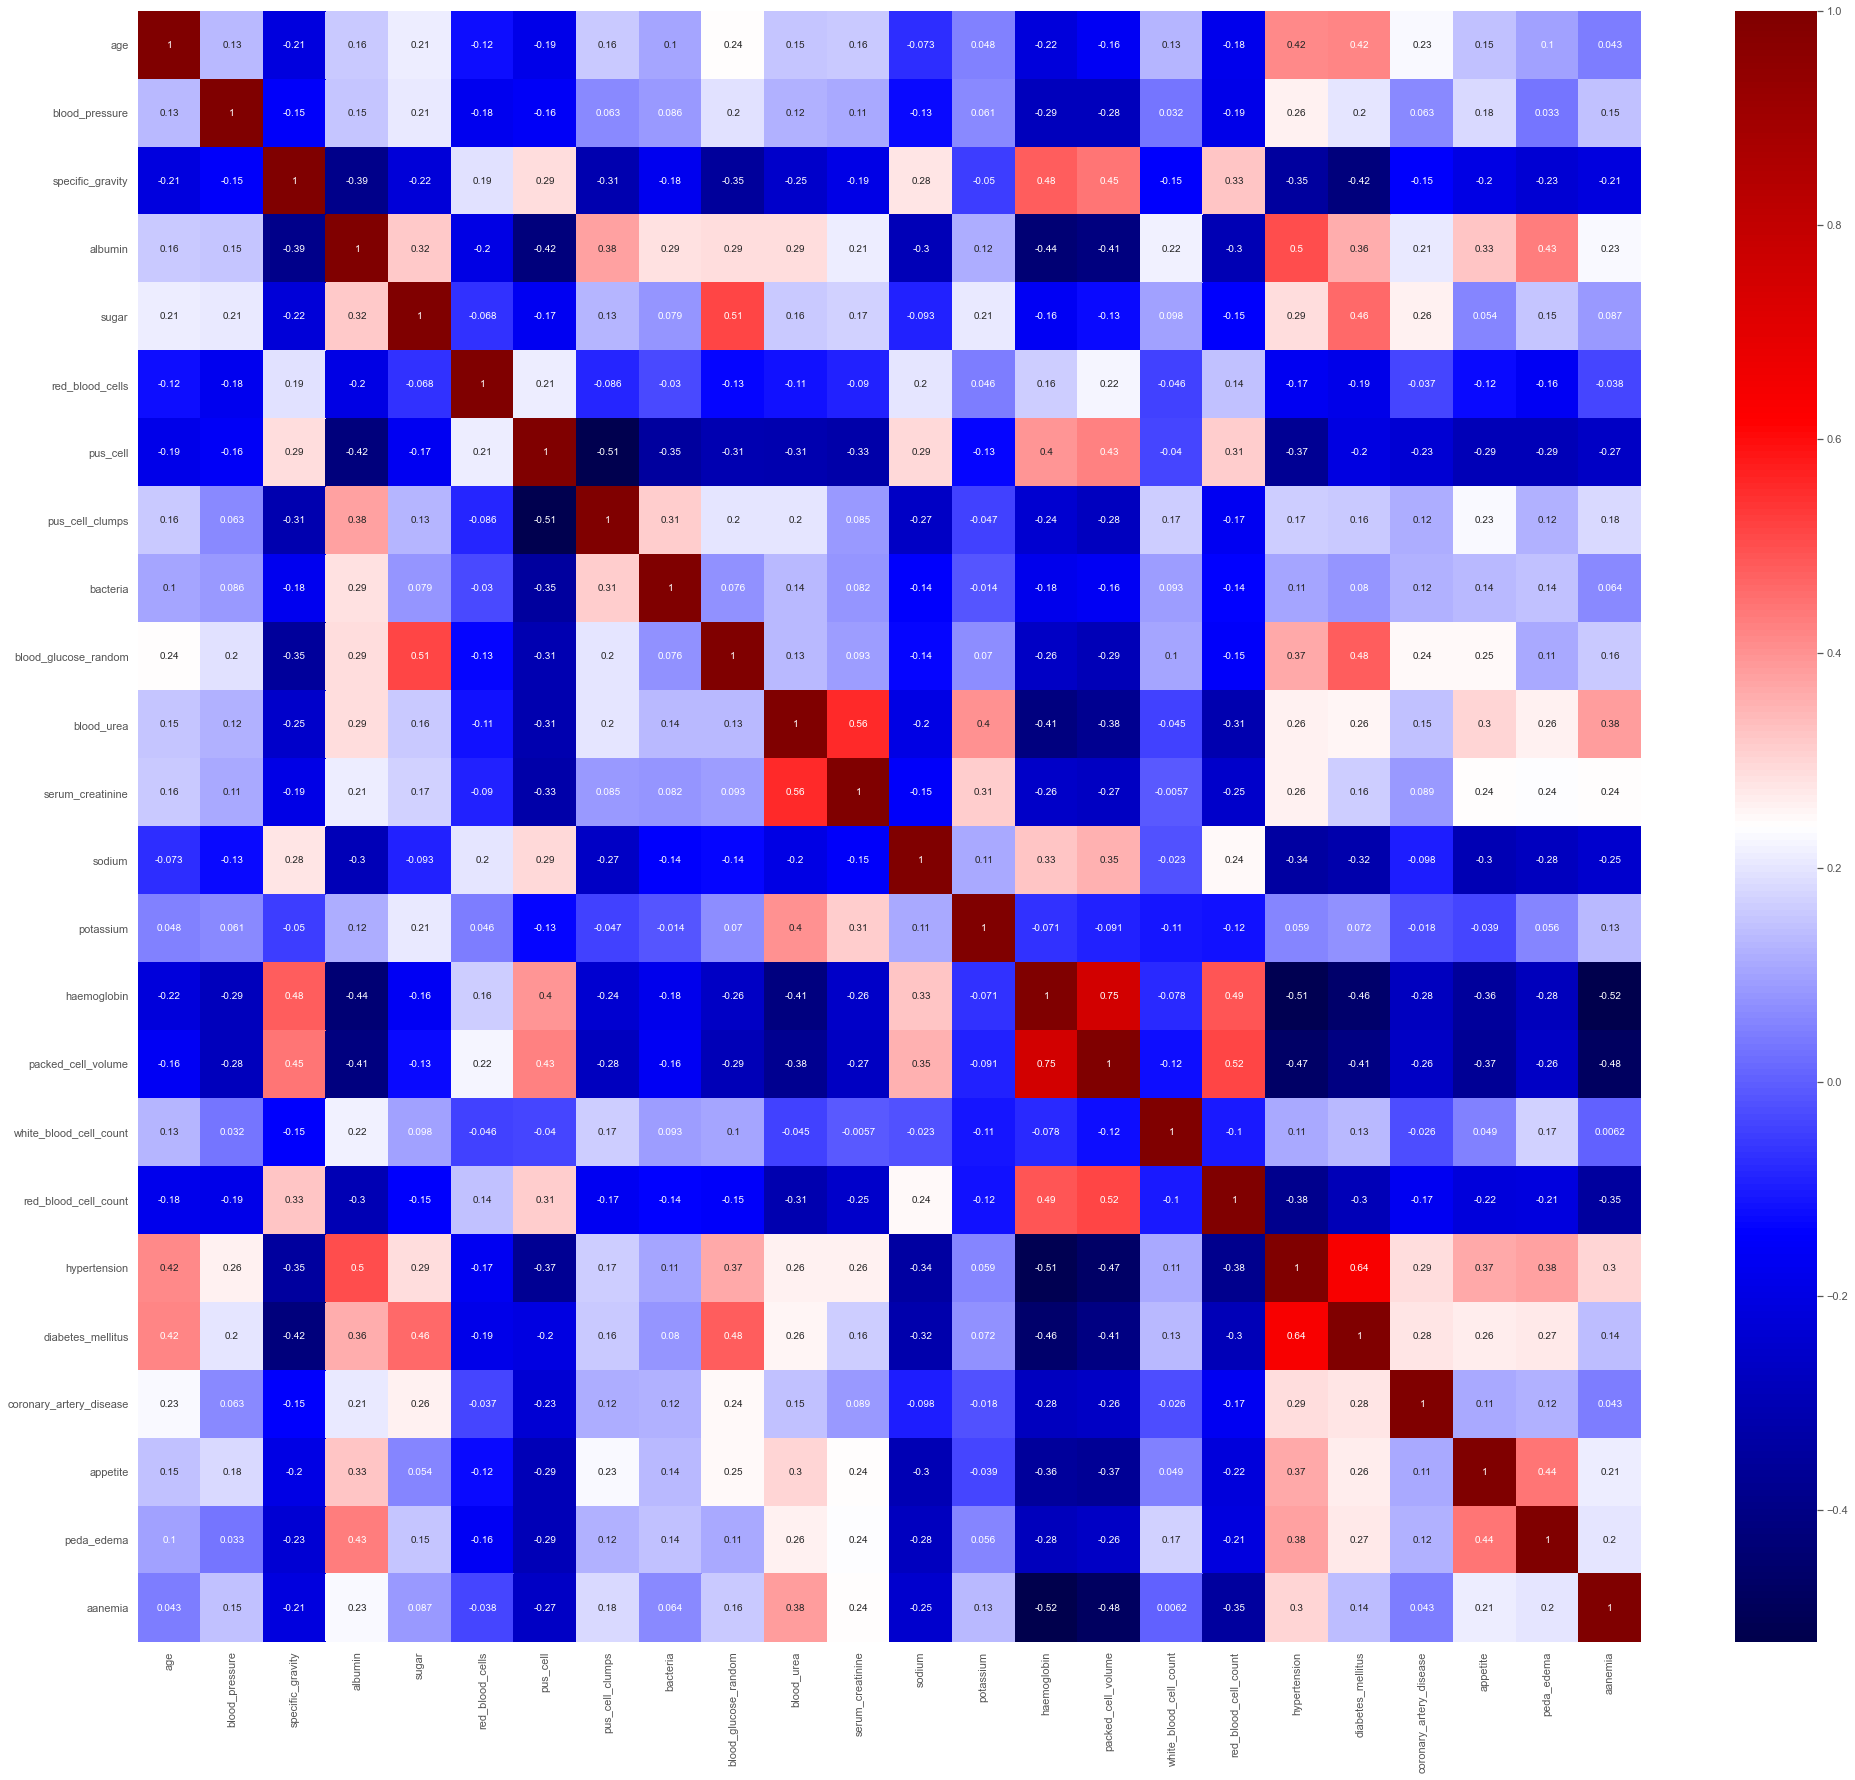

In [111]:
plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, cmap = "seismic");

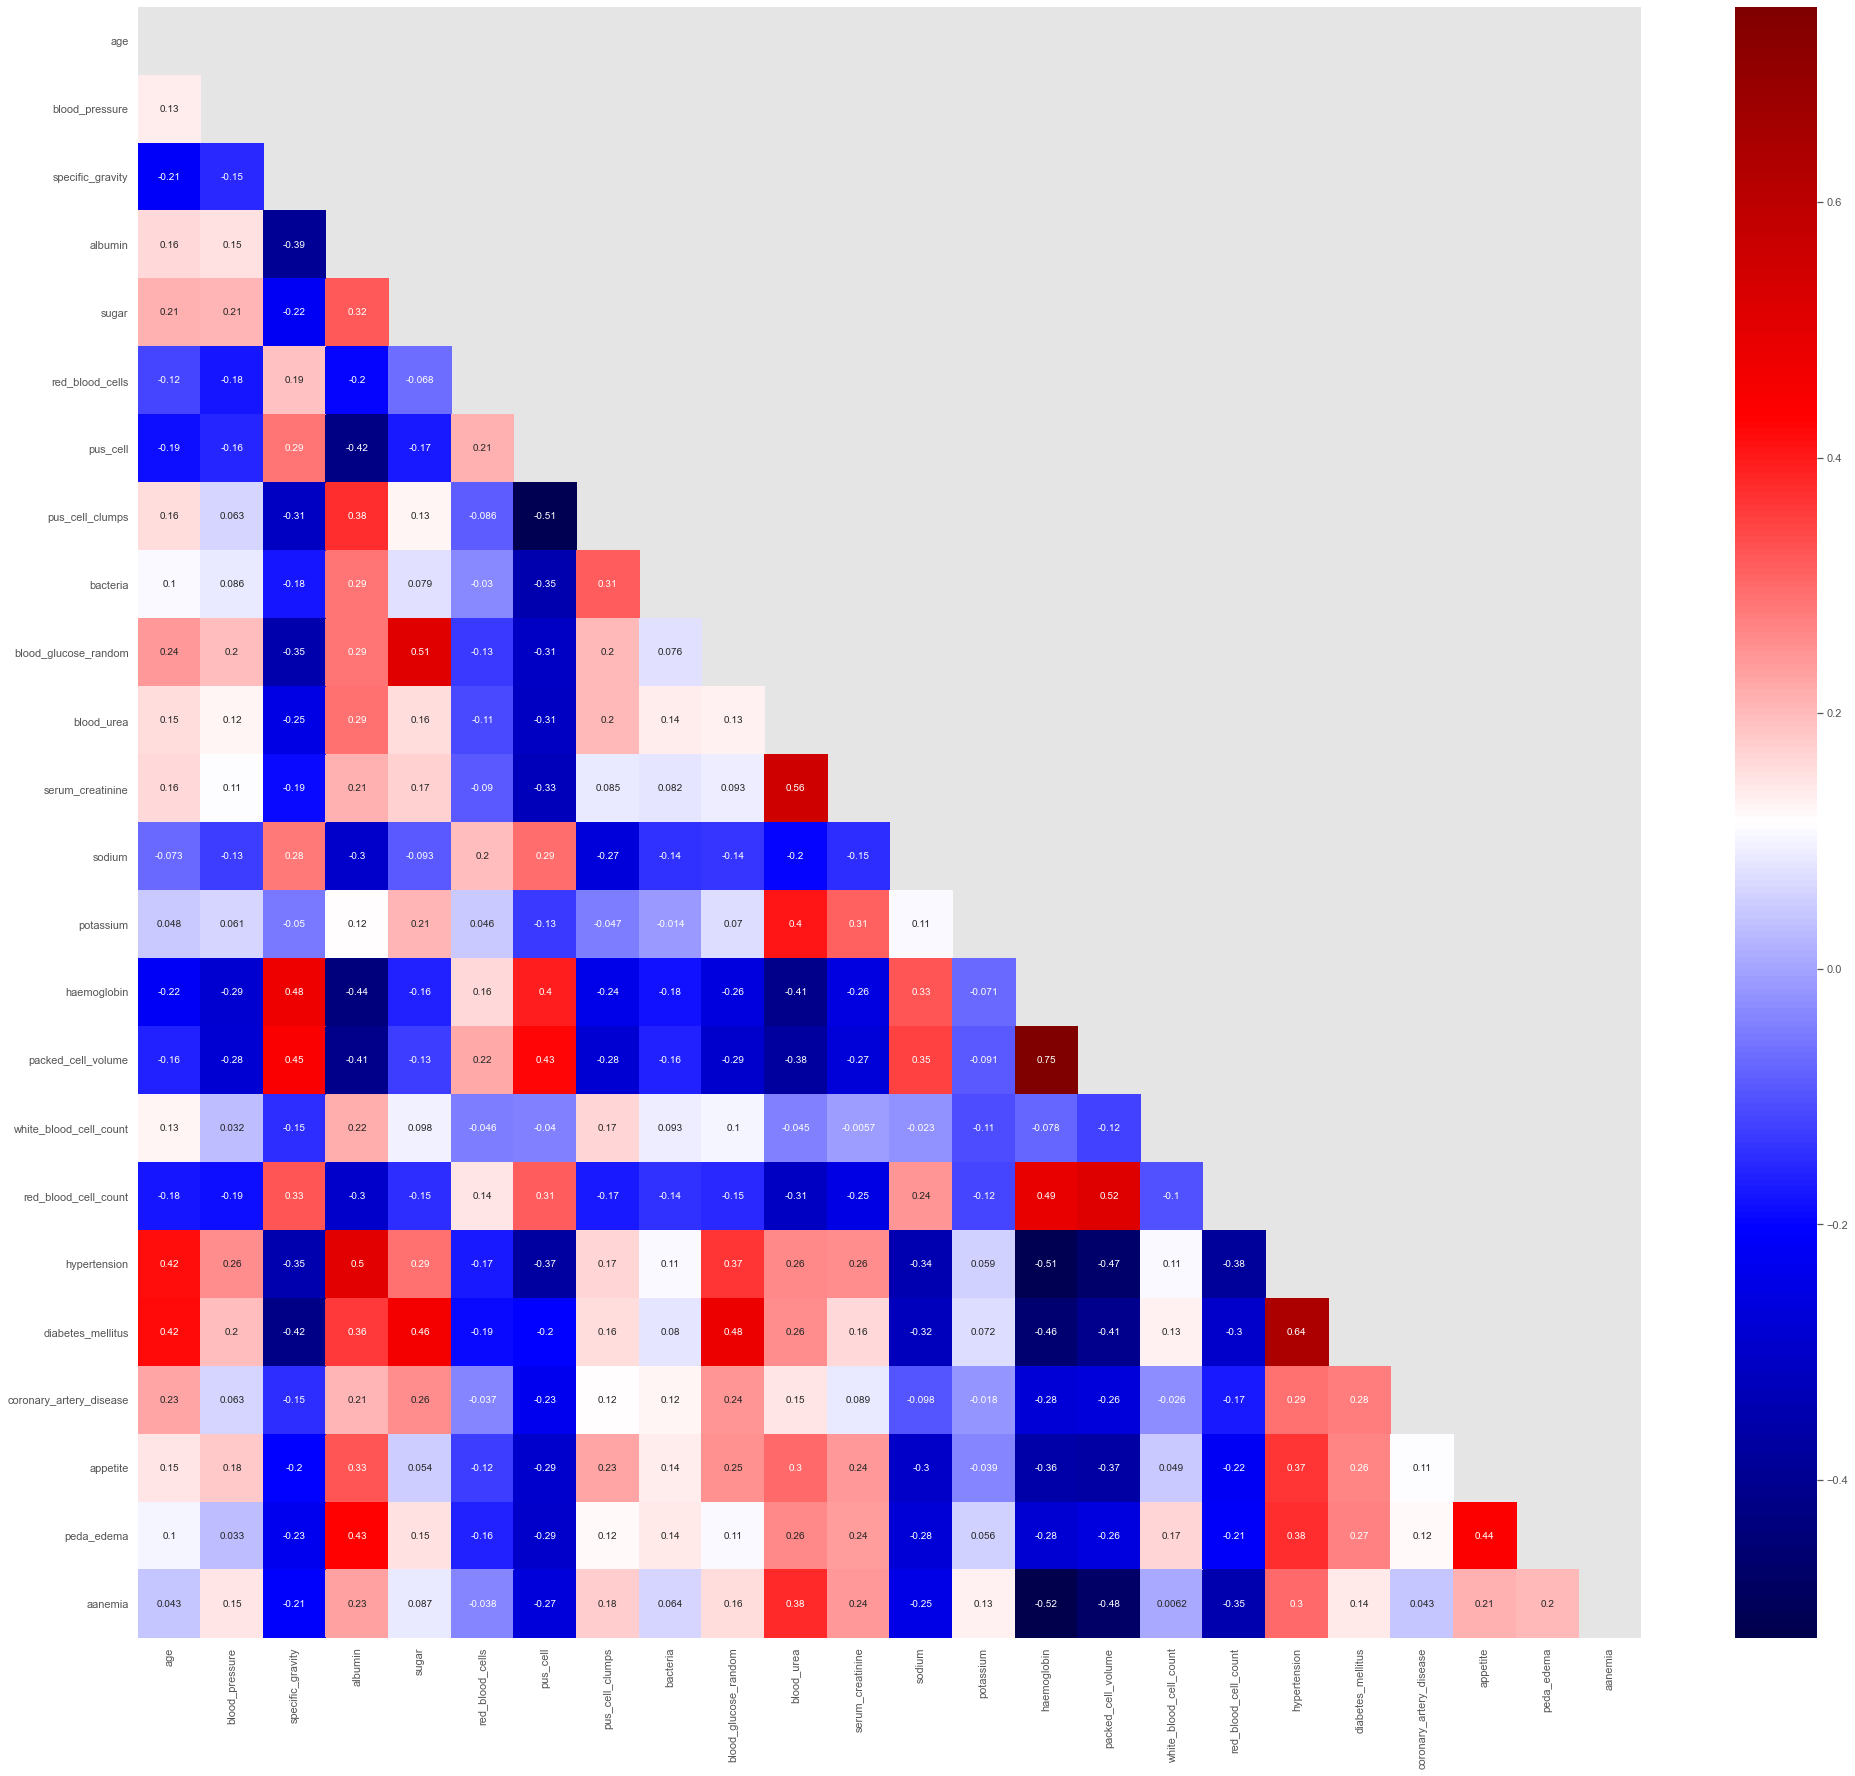

In [112]:
# use of the mask 
import numpy as np
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [113]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [114]:
corr_features = correlation(X_train, 0.85) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

0
set()


# Model Creation and Evaluation

In [115]:
from sklearn import metrics

# With train-test split

# ZeroR classifier

In [116]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.6357142857142857
Test Accuracy:  0.6


In [117]:
ac_zero1 = accuracy_score(y_pred_test, y_test)

In [118]:
ac_zero1

0.6

In [119]:
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[72  0]
 [48  0]]

Classification Report
              precision    recall  f1-score   support

           0      0.600     1.000     0.750        72
           1      0.000     0.000     0.000        48

    accuracy                          0.600       120
   macro avg      0.300     0.500     0.375       120
weighted avg      0.360     0.600     0.450       120



# Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [121]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [122]:
Y_pred=dt.predict(X_test)

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
ac_dt1=accuracy_score(y_test,Y_pred)

In [125]:
ac_dt1

0.9916666666666667

Depth =  2 , Training Accuracy =  0.9607142857142857 , Test Accuracy =  0.9833333333333333 , Diff =  2.261904761904754  %
Depth =  3 , Training Accuracy =  0.9892857142857143 , Test Accuracy =  0.9916666666666667 , Diff =  0.23809523809523725  %
Depth =  4 , Training Accuracy =  0.9964285714285714 , Test Accuracy =  0.9916666666666667 , Diff =  0.4761904761904745  %
Depth =  5 , Training Accuracy =  1.0 , Test Accuracy =  0.9666666666666667 , Diff =  3.3333333333333326  %
Depth =  6 , Training Accuracy =  1.0 , Test Accuracy =  0.9916666666666667 , Diff =  0.8333333333333304  %
Depth =  7 , Training Accuracy =  1.0 , Test Accuracy =  0.9916666666666667 , Diff =  0.8333333333333304  %
Depth =  8 , Training Accuracy =  1.0 , Test Accuracy =  0.9916666666666667 , Diff =  0.8333333333333304  %
Depth =  9 , Training Accuracy =  1.0 , Test Accuracy =  0.9916666666666667 , Diff =  0.8333333333333304  %
Depth =  10 , Training Accuracy =  1.0 , Test Accuracy =  0.9916666666666667 , Diff =  0.83

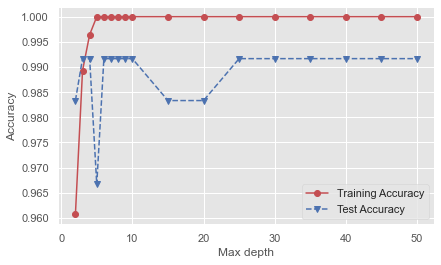

In [126]:
# Decision Tree analysis with the depth

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [127]:
# create a model 
dt2 = DecisionTreeClassifier(max_depth = 2, random_state=1)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [128]:
Y_predt1=dt2.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
ac_dt2=accuracy_score(y_test,Y_predt1)

In [131]:
ac_dt2

0.9833333333333333

# KNN

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [133]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [134]:
Y_pred_knn=knn.predict(X_test)

In [135]:
ac_knn1=accuracy_score(y_test,Y_pred_knn)

In [136]:
ac_knn1

0.9583333333333334

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.9583333333333334 , Difference =  4.1666666666666625 %
K =  5 , Training Accuracy =  0.9714285714285714  Test Accuracy =  0.9583333333333334 , Difference =  1.3095238095238049 %
K =  10 , Training Accuracy =  0.9607142857142857  Test Accuracy =  0.9666666666666667 , Difference =  0.5952380952380931 %
K =  15 , Training Accuracy =  0.9357142857142857  Test Accuracy =  0.9416666666666667 , Difference =  0.5952380952380931 %
K =  20 , Training Accuracy =  0.9321428571428572  Test Accuracy =  0.925 , Difference =  0.7142857142857117 %
K =  25 , Training Accuracy =  0.9035714285714286  Test Accuracy =  0.9166666666666666 , Difference =  1.3095238095238049 %
K =  30 , Training Accuracy =  0.8892857142857142  Test Accuracy =  0.9166666666666666 , Difference =  2.7380952380952395 %
K =  60 , Training Accuracy =  0.8321428571428572  Test Accuracy =  0.8333333333333334 , Difference =  0.11904761904761862 %
K =  100 , Training Accuracy =  0.75 

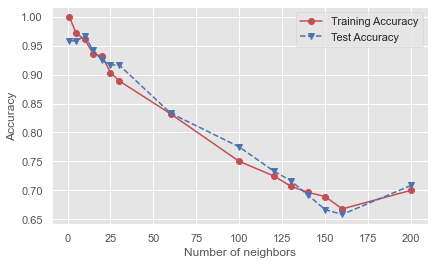

In [137]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.975 , Difference =  2.500000000000002 %
K =  5 , Training Accuracy =  0.9714285714285714  Test Accuracy =  0.9833333333333333 , Difference =  1.1904761904761862 %
K =  10 , Training Accuracy =  0.9571428571428572  Test Accuracy =  0.95 , Difference =  0.7142857142857229 %
K =  15 , Training Accuracy =  0.9285714285714286  Test Accuracy =  0.95 , Difference =  2.1428571428571352 %
K =  20 , Training Accuracy =  0.9142857142857143  Test Accuracy =  0.9416666666666667 , Difference =  2.7380952380952395 %
K =  25 , Training Accuracy =  0.8892857142857142  Test Accuracy =  0.9166666666666666 , Difference =  2.7380952380952395 %
K =  30 , Training Accuracy =  0.8857142857142857  Test Accuracy =  0.9083333333333333 , Difference =  2.261904761904765 %
K =  40 , Training Accuracy =  0.8571428571428571  Test Accuracy =  0.875 , Difference =  1.7857142857142905 %
K =  50 , Training Accuracy =  0.8071428571428572  Test Accuracy =  0.85833333333

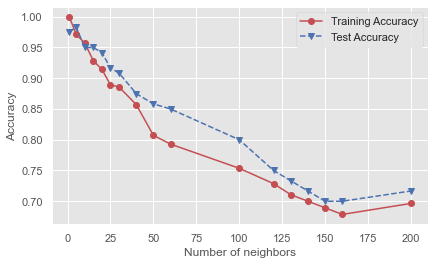

In [138]:
# KNN with Manhatten Distance Metric
numNeighbors = [1, 5, 10, 15, 20, 25, 30,40,50,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [139]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()
ac_lr1 = accuracy_score(y_pred_test, y_test)

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Logistic Regression with no regularization
Train Accuracy:  1.0
Test Accuracy:  0.9916666666666667

Logistic Regression with L2 regularization
Train Accuracy:  0.9785714285714285
Test Accuracy:  0.9833333333333333


In [140]:
ac_lr1

0.9916666666666667

# Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [142]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [143]:
Y_pred_rf=rf.predict(X_test)

In [144]:
ac_rf1=accuracy_score(y_test,Y_pred_rf)

In [145]:
ac_rf1

0.975

In [146]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  1.0
Test Accuracy:  0.975


In [147]:
ac_perceptron1 = accuracy_score(y_pred_test, y_test)

In [148]:
ac_perceptron1

0.975

In [149]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.9285714285714286
Test Accuracy:  0.9333333333333333


In [150]:
ac_naive1 = accuracy_score(y_pred_test, y_test)

In [151]:
ac_naive1

0.9333333333333333

In [152]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))


Train Accuracy:  0.9464285714285714
Test Accuracy:  0.9666666666666667


In [153]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[70  2]
 [ 2 46]]

Classification Report
              precision    recall  f1-score   support

           0      0.972     0.972     0.972        72
           1      0.958     0.958     0.958        48

    accuracy                          0.967       120
   macro avg      0.965     0.965     0.965       120
weighted avg      0.967     0.967     0.967       120



In [154]:
ac_svc1 = accuracy_score(y_pred_test, y_test)

In [155]:
ac_svc1

0.9666666666666667

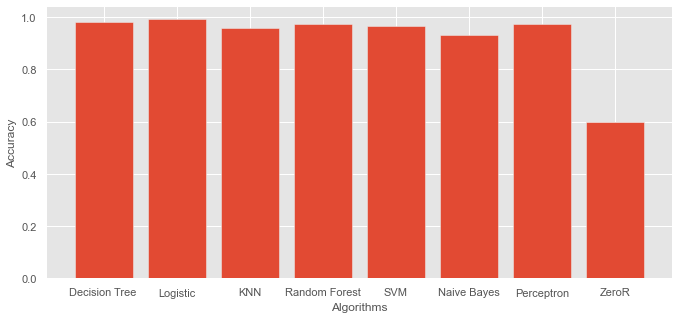

In [156]:
plt.figure(figsize = (10,5))
plt.bar(['Decision Tree ','Logistic','KNN','Random Forest','SVM','Naive Bayes','Perceptron','ZeroR'],[ac_dt2,ac_lr1,ac_knn1,ac_rf1,ac_svc1,ac_naive1,ac_perceptron1,ac_zero1])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

# Hyper Parameter Optimization

# DT HPT

In [182]:
#Manual

In [183]:
dt=DecisionTreeClassifier(max_depth=3,criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [184]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100
accuracy_dt

98.33333333333333

In [185]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.983


In [186]:
accuracy_score(prediction,y_test)

0.9833333333333333

In [187]:
#now let's try to do hyperparameter

In [188]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [189]:
#let's try with Randomized Search Cv

In [190]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
splitter = ["best", "random"]
# Create the random grid
random_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [191]:
rf=DecisionTreeClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [192]:
rf_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 778,
 'criterion': 'entropy'}

In [193]:
rf_randomcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=778, max_features='log2',
                       min_samples_leaf=2, min_samples_split=10)

In [194]:
best_random_grid=rf_randomcv.best_estimator_

In [195]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score 0.95


In [196]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [197]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[72  0]
 [ 6 42]]
0.95
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.88      0.93        48

    accuracy                           0.95       120
   macro avg       0.96      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



In [198]:
#GridSearch CV 

In [199]:
rf_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 778,
 'criterion': 'entropy'}

In [200]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] + 2,
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] + 3,
                          rf_randomcv.best_params_['min_samples_split'] + 4],
    'splitter': [rf_randomcv.best_params_['splitter']]}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [778], 'max_features': ['log2'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [12, 11, 10, 13, 14], 'splitter': ['best']}


In [201]:
rf2=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=rf2,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [778],
                         'max_features': ['log2'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [12, 11, 10, 13, 14],
                         'splitter': ['best']},
             verbose=2)

In [202]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=778, max_features='log2',
                       min_samples_leaf=6, min_samples_split=14)

In [203]:
best_grid=grid_search.best_estimator_

In [204]:
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=778, max_features='log2',
                       min_samples_leaf=6, min_samples_split=14)

In [205]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[72  0]
 [ 4 44]]
Accuracy Score 0.9666666666666667
Classification report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



# KNN HPT

In [206]:
#Manual

In [207]:
knn=KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [208]:
pred1=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,pred1)*100
accuracy_knn

98.33333333333333

In [209]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.964
Accuracy on test set: 0.983


In [210]:
accuracy_score(pred1,y_test)

0.9833333333333333

In [211]:
#now let's try to do hyperparameter

In [212]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [213]:
#let's try with Randomized Search Cv

In [214]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_neighbors = range(1, 200)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Create the random grid
random_grid1 = {'n_neighbors': n_neighbors,
               'weights': weights,
               'metric': metric
               }
print(random_grid1)

{'n_neighbors': range(1, 200), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [215]:
rf3=KNeighborsClassifier()
rf3_randomcv=RandomizedSearchCV(estimator=rf3,param_distributions=random_grid1,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf3_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 200),
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [216]:
rf3_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 2, 'metric': 'minkowski'}

In [217]:
rf3_randomcv.best_estimator_

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [218]:
best_random_grid1=rf3_randomcv.best_estimator_

In [219]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid1.predict(X_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score 0.9416666666666667


In [220]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [221]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[69  3]
 [ 4 44]]
0.9416666666666667
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.94      0.92      0.93        48

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [222]:
#GridSearch CV 

In [223]:
rf3_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 2, 'metric': 'minkowski'}

In [224]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'weights': [rf3_randomcv.best_params_['weights']],
    
    'n_neighbors': [rf3_randomcv.best_params_['n_neighbors'], 
                         rf3_randomcv.best_params_['n_neighbors']+2, 
                         rf3_randomcv.best_params_['n_neighbors'] + 4,
                   rf3_randomcv.best_params_['n_neighbors']-2, 
                         rf3_randomcv.best_params_['n_neighbors'] - 4],
    'metric': [rf3_randomcv.best_params_['metric']]}

print(param_grid)

{'weights': ['distance'], 'n_neighbors': [2, 4, 6, 0, -2], 'metric': ['minkowski']}


In [225]:
rf4=KNeighborsClassifier()
grid_search=GridSearchCV(estimator=rf4,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': [2, 4, 6, 0, -2],
                         'weights': ['distance']},
             verbose=2)

In [226]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [227]:
best_grid1=grid_search.best_estimator_

In [228]:
best_grid1

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [229]:
y_pred4=best_grid1.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred4)))
print("Classification report: {}".format(classification_report(y_test,y_pred4)))

[[71  1]
 [ 4 44]]
Accuracy Score 0.9583333333333334
Classification report:               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.98      0.92      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



# Logistic regression

In [230]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf6 = LogisticRegression(penalty = 'none')

clf6.fit(X_train, y_train)
y_pred_train = clf6.predict(X_train)
y_pred_test = clf6.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()



Logistic Regression with no regularization
Train Accuracy:  1.0
Test Accuracy:  0.9666666666666667



In [231]:
clf6.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [232]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.994048 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.992857 (0.017003) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.992857 (0.017003) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.994048 (0.013310) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.991667 (0.017698) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.991667 (0.017698) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.985714 (0.025422) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.983333 (0.022080) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.983333 (0.022080) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.958333 (0.036981) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.963095 (0.035094) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.963095 (0.035094) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.927381 (0.041735) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.635714 (0.014286) wit

In [233]:
grid_y_predicted = grid_result.predict(X_test)

In [234]:
grid_y_predicted

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [235]:
logis_grid_score=accuracy_score(y_test, grid_y_predicted)

In [236]:
logis_grid_score

0.975

In [237]:
confusion_matrix(y_test, grid_y_predicted)

array([[71,  1],
       [ 2, 46]], dtype=int64)

In [238]:
print(classification_report(y_test,grid_y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.96      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



did not improve much after hyper parameter tuning 

# With Stratified Train Test split

In [239]:
from sklearn import metrics

# With train-test split

# ZeroR classifier

In [240]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Train Accuracy:  0.625
Test Accuracy:  0.625


In [241]:
ac_zero2 = accuracy_score(y_pred_test, y1_test)

In [242]:
ac_zero2

0.625

In [243]:
#As there is class imbalance issue,we need classification report as well

In [244]:
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y1_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y1_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[75  0]
 [45  0]]

Classification Report
              precision    recall  f1-score   support

           0      0.625     1.000     0.769        75
           1      0.000     0.000     0.000        45

    accuracy                          0.625       120
   macro avg      0.312     0.500     0.385       120
weighted avg      0.391     0.625     0.481       120



# Decision Tree

In [245]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [246]:
dt.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [247]:
Y_pred=dt.predict(X1_test)

In [248]:
from sklearn.metrics import accuracy_score

In [249]:
ac_dt4=accuracy_score(y1_test,Y_pred)

In [250]:
ac_dt4

0.975

Depth =  2 , Training Accuracy =  0.9785714285714285 , Test Accuracy =  0.9666666666666667 , Diff =  1.1904761904761862  %
Depth =  3 , Training Accuracy =  0.9964285714285714 , Test Accuracy =  0.9833333333333333 , Diff =  1.309523809523816  %
Depth =  4 , Training Accuracy =  1.0 , Test Accuracy =  0.9833333333333333 , Diff =  1.6666666666666718  %
Depth =  5 , Training Accuracy =  1.0 , Test Accuracy =  0.975 , Diff =  2.500000000000002  %
Depth =  6 , Training Accuracy =  1.0 , Test Accuracy =  0.9833333333333333 , Diff =  1.6666666666666718  %
Depth =  7 , Training Accuracy =  1.0 , Test Accuracy =  0.975 , Diff =  2.500000000000002  %
Depth =  8 , Training Accuracy =  1.0 , Test Accuracy =  0.9833333333333333 , Diff =  1.6666666666666718  %
Depth =  9 , Training Accuracy =  1.0 , Test Accuracy =  0.975 , Diff =  2.500000000000002  %
Depth =  10 , Training Accuracy =  1.0 , Test Accuracy =  0.975 , Diff =  2.500000000000002  %
Depth =  15 , Training Accuracy =  1.0 , Test Accuracy

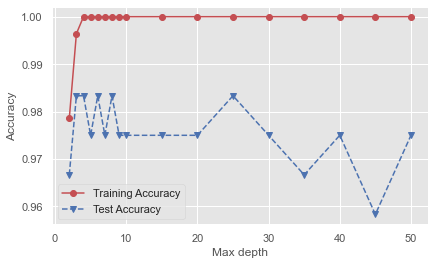

In [251]:
# Decision Tree analysis with the depth

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X1_train, y1_train)
    y_predTrain = clf.predict(X1_train)
    y_predTest = clf.predict(X1_test)
    trainAcc[index] = accuracy_score(y1_train, y_predTrain)
    testAcc[index] = accuracy_score(y1_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [252]:
# create a model 
dt5 = DecisionTreeClassifier(max_depth = 2, random_state=1)
dt5.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [253]:
Y_predt1=dt5.predict(X1_test)

In [254]:
from sklearn.metrics import accuracy_score

In [255]:
ac_dt2=accuracy_score(y1_test,Y_predt1)

In [256]:
ac_dt2

0.9666666666666667

# KNN

In [257]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [258]:
knn.fit(X1_train, y1_train)

KNeighborsClassifier()

In [259]:
Y_pred_knn=knn.predict(X1_test)

In [260]:
ac_knn1=accuracy_score(y1_test,Y_pred_knn)

In [261]:
ac_knn1

0.9583333333333334

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.9666666666666667 , Difference =  3.3333333333333326 %
K =  5 , Training Accuracy =  0.9892857142857143  Test Accuracy =  0.9583333333333334 , Difference =  3.0952380952380953 %
K =  10 , Training Accuracy =  0.9785714285714285  Test Accuracy =  0.9416666666666667 , Difference =  3.6904761904761885 %
K =  15 , Training Accuracy =  0.9571428571428572  Test Accuracy =  0.9 , Difference =  5.714285714285716 %
K =  20 , Training Accuracy =  0.9357142857142857  Test Accuracy =  0.8833333333333333 , Difference =  5.238095238095242 %
K =  25 , Training Accuracy =  0.9035714285714286  Test Accuracy =  0.8583333333333333 , Difference =  4.52380952380953 %
K =  30 , Training Accuracy =  0.8928571428571429  Test Accuracy =  0.85 , Difference =  4.285714285714293 %
K =  60 , Training Accuracy =  0.825  Test Accuracy =  0.7833333333333333 , Difference =  4.1666666666666625 %
K =  100 , Training Accuracy =  0.75  Test Accuracy =  0.708333333333333

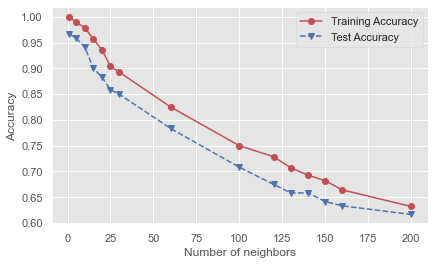

In [262]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X1_train, y1_train)
    y_predTrain = clf.predict(X1_train)
    y_predTest = clf.predict(X1_test)
    trainAcc.append(accuracy_score(y1_train, y_predTrain))
    testAcc.append(accuracy_score(y1_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.9666666666666667 , Difference =  3.3333333333333326 %
K =  5 , Training Accuracy =  0.9821428571428571  Test Accuracy =  0.9416666666666667 , Difference =  4.047619047619044 %
K =  10 , Training Accuracy =  0.9642857142857143  Test Accuracy =  0.9083333333333333 , Difference =  5.595238095238098 %
K =  15 , Training Accuracy =  0.9392857142857143  Test Accuracy =  0.8583333333333333 , Difference =  8.0952380952381 %
K =  20 , Training Accuracy =  0.925  Test Accuracy =  0.85 , Difference =  7.500000000000007 %
K =  25 , Training Accuracy =  0.9142857142857143  Test Accuracy =  0.8416666666666667 , Difference =  7.261904761904758 %
K =  30 , Training Accuracy =  0.8928571428571429  Test Accuracy =  0.8416666666666667 , Difference =  5.119047619047623 %
K =  40 , Training Accuracy =  0.8785714285714286  Test Accuracy =  0.8166666666666667 , Difference =  6.190476190476191 %
K =  50 , Training Accuracy =  0.85  Test Accuracy =  0.8 , D

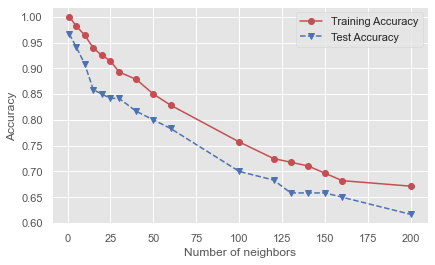

In [263]:
# KNN with Manhatten Distance Metric
numNeighbors = [1, 5, 10, 15, 20, 25, 30,40,50,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X1_train, y1_train)
    y_predTrain = clf.predict(X1_train)
    y_predTest = clf.predict(X1_test)
    trainAcc.append(accuracy_score(y1_train, y_predTrain))
    testAcc.append(accuracy_score(y1_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [264]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(penalty = 'none')

lr2.fit(X1_train, y1_train)
y_pred_train = lr2.predict(X1_train)
y_pred_test = lr2.predict(X1_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))
print()
ac_lr1 = accuracy_score(y_pred_test, y1_test)

lr3 = LogisticRegression(penalty = 'l2')

lr3.fit(X1_train, y1_train)
y_pred_train = lr3.predict(X1_train)
y_pred_test = lr3.predict(X1_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Logistic Regression with no regularization
Train Accuracy:  1.0
Test Accuracy:  0.9583333333333334

Logistic Regression with L2 regularization
Train Accuracy:  0.9928571428571429
Test Accuracy:  0.9666666666666667


In [265]:
ac_lr1

0.9583333333333334

# Random Forest

In [266]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [267]:
rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [268]:
Y_pred_rf=rf.predict(X1_test)

In [269]:
ac_rf1=accuracy_score(y1_test,Y_pred_rf)

In [270]:
ac_rf1

0.9833333333333333

In [271]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Train Accuracy:  1.0
Test Accuracy:  0.975


In [272]:
ac_perceptron1 = accuracy_score(y_pred_test, y1_test)

In [273]:
ac_perceptron1

0.975

In [274]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Train Accuracy:  0.9321428571428572
Test Accuracy:  0.9


In [275]:
ac_naive1 = accuracy_score(y_pred_test, y1_test)

In [276]:
ac_naive1

0.9

In [277]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))


Train Accuracy:  0.9678571428571429
Test Accuracy:  0.9333333333333333


In [278]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y1_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y1_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[67  8]
 [ 0 45]]

Classification Report
              precision    recall  f1-score   support

           0      1.000     0.893     0.944        75
           1      0.849     1.000     0.918        45

    accuracy                          0.933       120
   macro avg      0.925     0.947     0.931       120
weighted avg      0.943     0.933     0.934       120



In [279]:
ac_svc1 = accuracy_score(y_pred_test, y1_test)

In [280]:
ac_svc1

0.9333333333333333

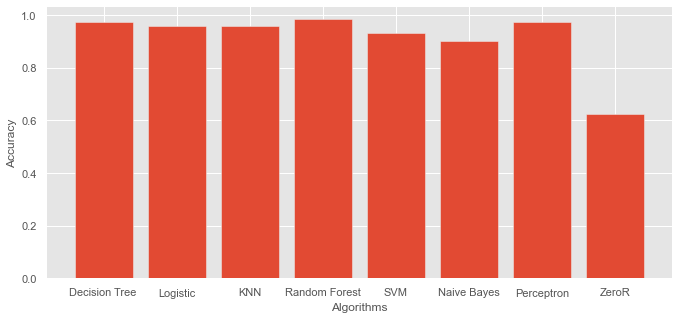

In [283]:
plt.figure(figsize = (10,5))
plt.bar(['Decision Tree ','Logistic','KNN','Random Forest','SVM','Naive Bayes','Perceptron','ZeroR'],[ac_dt4,ac_lr1,ac_knn1,ac_rf1,ac_svc1,ac_naive1,ac_perceptron1,ac_zero2])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

# Hyper Parameter Optimization

# DT HPT

In [284]:
#Manual

In [285]:
dt=DecisionTreeClassifier(max_depth=2,criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X1_train,y1_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=10)

In [286]:
prediction=dt.predict(X1_test)
accuracy_dt=accuracy_score(y1_test,prediction)*100
accuracy_dt

96.66666666666667

In [287]:
print("Accuracy on training set: {:.3f}".format(dt.score(X1_train, y1_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X1_test, y1_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.967


In [288]:
accuracy_score(prediction,y1_test)

0.9666666666666667

In [289]:
#now let's try to do hyperparameter

In [290]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [291]:
#let's try with Randomized Search Cv

In [292]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
splitter = ["best", "random"]
# Create the random grid
random_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [293]:
rf=DecisionTreeClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X1_train,y1_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [294]:
rf_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 889,
 'criterion': 'entropy'}

In [295]:
rf_randomcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=889, max_features='auto',
                       min_samples_leaf=4, min_samples_split=10)

In [296]:
best_random_grid=rf_randomcv.best_estimator_

In [297]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X1_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score 0.55


In [298]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [299]:
print(confusion_matrix(y1_test,y_pred))
print(accuracy_score(y1_test,y_pred))
print(classification_report(y1_test,y_pred))

[[72  3]
 [ 2 43]]
0.9583333333333334
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.93      0.96      0.95        45

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [300]:
#GridSearch CV 

In [301]:
rf_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 889,
 'criterion': 'entropy'}

In [302]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] + 2,
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] + 3,
                          rf_randomcv.best_params_['min_samples_split'] + 4],
    'splitter': [rf_randomcv.best_params_['splitter']]}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [889], 'max_features': ['auto'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [12, 11, 10, 13, 14], 'splitter': ['best']}


In [303]:
rf2=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=rf2,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X1_train,y1_train)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [889],
                         'max_features': ['auto'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [12, 11, 10, 13, 14],
                         'splitter': ['best']},
             verbose=2)

In [304]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=889, max_features='auto',
                       min_samples_leaf=4, min_samples_split=13)

In [305]:
best_grid=grid_search.best_estimator_

In [306]:
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=889, max_features='auto',
                       min_samples_leaf=4, min_samples_split=13)

In [307]:
y_pred=best_grid.predict(X1_test)
print(confusion_matrix(y1_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y1_test,y_pred)))
print("Classification report: {}".format(classification_report(y1_test,y_pred)))

[[71  4]
 [ 3 42]]
Accuracy Score 0.9416666666666667
Classification report:               precision    recall  f1-score   support

           0       0.96      0.95      0.95        75
           1       0.91      0.93      0.92        45

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



# KNN HPT

In [308]:
#Manual

In [309]:
knn=KNeighborsClassifier(n_neighbors=100, metric='minkowski', p=1)
knn.fit(X1_train,y1_train)

KNeighborsClassifier(n_neighbors=100, p=1)

In [310]:
pred1=knn.predict(X1_test)
accuracy_knn=accuracy_score(y1_test,pred1)*100
accuracy_knn

70.0

In [311]:
print("Accuracy on training set: {:.3f}".format(knn.score(X1_train, y1_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X1_test, y1_test)))

Accuracy on training set: 0.757
Accuracy on test set: 0.700


In [312]:
accuracy_score(pred1,y1_test)

0.7

In [313]:
#now let's try to do hyperparameter

In [314]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [315]:
#let's try with Randomized Search Cv

In [316]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_neighbors = range(1, 200)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Create the random grid
random_grid1 = {'n_neighbors': n_neighbors,
               'weights': weights,
               'metric': metric
               }
print(random_grid1)

{'n_neighbors': range(1, 200), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [317]:
rf3=KNeighborsClassifier()
rf3_randomcv=RandomizedSearchCV(estimator=rf3,param_distributions=random_grid1,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf3_randomcv.fit(X1_train,y1_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 200),
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [318]:
rf3_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 2, 'metric': 'manhattan'}

In [319]:
rf3_randomcv.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')

In [320]:
best_random_grid1=rf3_randomcv.best_estimator_

In [321]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid1.predict(X1_test)

print("Accuracy Score {}".format(accuracy_score(y1_test,y_pred)))


Accuracy Score 0.9666666666666667


In [322]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [323]:
print(confusion_matrix(y1_test,y_pred))
print(accuracy_score(y1_test,y_pred))
print(classification_report(y1_test,y_pred))

[[72  3]
 [ 1 44]]
0.9666666666666667
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.94      0.98      0.96        45

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



In [324]:
#GridSearch CV 

In [325]:
rf3_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 2, 'metric': 'manhattan'}

In [326]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'weights': [rf3_randomcv.best_params_['weights']],
    
    'n_neighbors': [rf3_randomcv.best_params_['n_neighbors'], 
                         rf3_randomcv.best_params_['n_neighbors']+2, 
                         rf3_randomcv.best_params_['n_neighbors'] + 4,
                   rf3_randomcv.best_params_['n_neighbors']-2, 
                         rf3_randomcv.best_params_['n_neighbors'] - 4],
    'metric': [rf3_randomcv.best_params_['metric']]}

print(param_grid)

{'weights': ['distance'], 'n_neighbors': [2, 4, 6, 0, -2], 'metric': ['manhattan']}


In [327]:
rf4=KNeighborsClassifier()
grid_search=GridSearchCV(estimator=rf4,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X1_train,y1_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': [2, 4, 6, 0, -2],
                         'weights': ['distance']},
             verbose=2)

In [328]:
grid_search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')

In [329]:
best_grid1=grid_search.best_estimator_

In [330]:
best_grid1

KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')

In [331]:
y_pred4=best_grid1.predict(X1_test)
print(confusion_matrix(y_test,y_pred4))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred4)))
print("Classification report: {}".format(classification_report(y_test,y_pred4)))

[[45 27]
 [28 20]]
Accuracy Score 0.5416666666666666
Classification report:               precision    recall  f1-score   support

           0       0.62      0.62      0.62        72
           1       0.43      0.42      0.42        48

    accuracy                           0.54       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.54      0.54      0.54       120



# Logistic regression

In [332]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf6 = LogisticRegression(penalty = 'none')

clf6.fit(X1_train, y1_train)
y_pred_train = clf6.predict(X1_train)
y_pred_test = clf6.predict(X1_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))
print()



Logistic Regression with no regularization
Train Accuracy:  1.0
Test Accuracy:  0.9583333333333334



In [333]:
clf6.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [334]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X1_train, y1_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
1.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
1.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.992857 (0.014286) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
1.000000 (0.000000) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
1.000000 (0.000000) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.989286 (0.018785) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.985714 (0.019778) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.985714 (0.019778) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.969048 (0.031587) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.972619 (0.027173) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.972619 (0.027173) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.948810 (0.036519) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.670238 (0.044876) wit

In [335]:
grid_y_predicted = grid_result.predict(X1_test)

In [336]:
grid_y_predicted

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [337]:
logis_grid_score=accuracy_score(y1_test, grid_y_predicted)

In [338]:
logis_grid_score

0.9666666666666667

In [339]:
confusion_matrix(y1_test, grid_y_predicted)

array([[72,  3],
       [ 1, 44]], dtype=int64)

In [340]:
print(classification_report(y1_test,grid_y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.94      0.98      0.96        45

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



did not improve much after hyper parameter tuning 